In [ ]:
pip install git+https://github.com/Trusted-AI/AIF360

  Cloning https://github.com/Trusted-AI/AIF360 to /tmp/pip-req-build-9_q2ar19
  Running command git clone --filter=blob:none --quiet https://github.com/Trusted-AI/AIF360 /tmp/pip-req-build-9_q2ar19
  Resolved https://github.com/Trusted-AI/AIF360 to commit e011686ba3d30cd21e04219e502fe33a74ab3817
  Preparing metadata (setup.py) ... done
  Created wheel for aif360: filename=aif360-0.6.1-py3-none-any.whl size=259603 sha256=7a77040efb2a5af3fb72dcf55b06db24d1ca223f0e33d2258a75c05be87d018c
  Stored in directory: /tmp/pip-ephem-wheel-cache-2wyqed5b/wheels/99/1f/4f/7145d15fe428df4277a33a5de793c31052151760c12ab1ecac
Successfully built aif360


In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=44a88c888b20a59b9c28e270163324d01cc140e0d327a76af348e8eb5424d541
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import sys
sys.path.insert(0, '../')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown, display

# Datasets
from aif360.datasets import MEPSDataset19
from aif360.datasets import MEPSDataset20
from aif360.datasets import MEPSDataset21

# Fairness metrics
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric

# Explainers
from aif360.explainers import MetricTextExplainer

# Scalers
from sklearn.preprocessing import StandardScaler

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Bias mitigation techniques
from aif360.algorithms.preprocessing import Reweighing
from aif360.algorithms.inprocessing import PrejudiceRemover

# LIME
from aif360.datasets.lime_encoder import LimeEncoder
import lime
from lime.lime_tabular import LimeTabularExplainer

np.random.seed(1)

pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
mortgage = pd.read_csv("/content/state_CO_lei_7H6GLXDRUGQFU57RNE97 (1).csv")

In [ ]:
mortgage.head()

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2023,7H6GLXDRUGQFU57RNE97,14500,CO,8013,8013060900,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,5441,24.79,144100,90.75,1480,1669,30
1,2023,7H6GLXDRUGQFU57RNE97,24540,CO,8123,8123001905,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,4712,63.60,109300,74.38,1135,1531,32
2,2023,7H6GLXDRUGQFU57RNE97,17820,CO,8041,8041003306,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,3248,24.88,105000,153.20,983,1226,27
3,2023,7H6GLXDRUGQFU57RNE97,22660,CO,8069,8069001106,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,5312,21.69,118700,67.28,1033,1512,41
4,2023,7H6GLXDRUGQFU57RNE97,24540,CO,8123,8123002008,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,6148,21.01,109300,163.09,1504,1493,14


In [ ]:
mortgage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811 entries, 0 to 2810
Data columns (total 99 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   activity_year                             2811 non-null   int64  
 1   lei                                       2811 non-null   object 
 2   derived_msa-md                            2811 non-null   int64  
 3   state_code                                2811 non-null   object 
 4   county_code                               2811 non-null   int64  
 5   census_tract                              2811 non-null   int64  
 6   conforming_loan_limit                     2766 non-null   object 
 7   derived_loan_product_type                 2811 non-null   object 
 8   derived_dwelling_category                 2811 non-null   object 
 9   derived_ethnicity                         2811 non-null   object 
 10  derived_race                        

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

# Set random seed for reproducibility
np.random.seed(1)

# Define protected attributes and privileged/unprivileged classes
protected_attributes = ['applicant_ethnicity-1', 'applicant_race-1', 'applicant_sex']
privileged_classes = [['2'], ['5'], ['1']]
unprivileged_classes = [['2', '3', '4'],  # For applicant_ethnicity-1
                       ['6', '7', '8'],  # For applicant_race-1
                       ['2', '3', '4']]  # For applicant_sex

def create_dataset_splits(data, test_size=0.2, val_size=0.25):
    """
    Split the dataset into train, validation, and test sets
    """
    # First split into train and temp
    train_data, temp_data = train_test_split(data, test_size=test_size + val_size,
                                           random_state=1)

    # Then split temp into validation and test
    val_ratio = val_size / (test_size + val_size)
    val_data, test_data = train_test_split(temp_data, test_size=val_ratio,
                                         random_state=1)

    return train_data, val_data, test_data

def describe_mortgage_data(train=None, val=None, test=None):
    """
    Print descriptive information about the mortgage dataset
    """
    if train is not None:
        display(Markdown("#### Training Dataset shape"))
        print(train.shape)
    if val is not None:
        display(Markdown("#### Validation Dataset shape"))
        print(val.shape)
    if test is not None:
        display(Markdown("#### Test Dataset shape"))
        print(test.shape)

    display(Markdown("#### Protected attribute names"))
    print(protected_attributes)

    display(Markdown("#### Privileged classes"))
    for attr, priv in zip(protected_attributes, privileged_classes):
        print(f"{attr}: {priv}")

    display(Markdown("#### Unprivileged classes"))
    for attr, unpriv in zip(protected_attributes, unprivileged_classes):
        print(f"{attr}: {unpriv}")

    if train is not None:
        display(Markdown("#### Distribution of protected attributes in training data"))
        for attr in protected_attributes:
            print(f"\nDistribution for {attr}:")
            print(train[attr].value_counts())

# Split the data
train_data, val_data, test_data = create_dataset_splits(mortgage)

# Create metrics for bias assessment
def compute_group_metrics(data, protected_attr):
    """
    Compute basic metrics for each group in the protected attribute
    """
    metrics = {}
    for group in data[protected_attr].unique():
        group_data = data[data[protected_attr] == group]
        metrics[group] = {
            'size': len(group_data),
            'proportion': len(group_data) / len(data),
            'approval_rate': group_data['action_taken'].mean()
        }
    return metrics

# Function to display bias metrics
def display_bias_metrics(data, protected_attrs=protected_attributes):
    """
    Display bias metrics for all protected attributes
    """
    for attr in protected_attrs:
        display(Markdown(f"#### Bias metrics for {attr}"))
        metrics = compute_group_metrics(data, attr)
        for group, group_metrics in metrics.items():
            print(f"\nGroup {group}:")
            for metric_name, value in group_metrics.items():
                print(f"{metric_name}: {value:.4f}")

In [ ]:
# Display dataset information
describe_mortgage_data(train_data, val_data, test_data)

# Show bias metrics for training data
display_bias_metrics(train_data)

#### Training Dataset shape

(1546, 99)


#### Validation Dataset shape

(562, 99)


#### Test Dataset shape

(703, 99)


#### Protected attribute names

['applicant_ethnicity-1', 'applicant_race-1', 'applicant_sex']


#### Privileged classes

applicant_ethnicity-1: ['2']
applicant_race-1: ['5']
applicant_sex: ['1']


#### Unprivileged classes

applicant_ethnicity-1: ['2', '3', '4']
applicant_race-1: ['6', '7', '8']
applicant_sex: ['2', '3', '4']


#### Distribution of protected attributes in training data


Distribution for applicant_ethnicity-1:
applicant_ethnicity-1
2     1007
4      344
3       95
1       89
11       6
14       4
12       1
Name: count, dtype: int64

Distribution for applicant_race-1:
applicant_race-1
5     960
7     344
6     108
2      73
3      28
1      13
21      7
27      3
26      3
23      2
22      2
24      2
25      1
Name: count, dtype: int64

Distribution for applicant_sex:
applicant_sex
1    758
2    405
4    344
3     38
6      1
Name: count, dtype: int64


#### Bias metrics for applicant_ethnicity-1


Group 2:
size: 1007.0000
proportion: 0.6514
approval_rate: 2.8183

Group 1:
size: 89.0000
proportion: 0.0576
approval_rate: 2.7978

Group 3:
size: 95.0000
proportion: 0.0614
approval_rate: 3.4632

Group 4:
size: 344.0000
proportion: 0.2225
approval_rate: 5.3285

Group 11:
size: 6.0000
proportion: 0.0039
approval_rate: 2.6667

Group 14:
size: 4.0000
proportion: 0.0026
approval_rate: 1.0000

Group 12:
size: 1.0000
proportion: 0.0006
approval_rate: 5.0000


#### Bias metrics for applicant_race-1


Group 5:
size: 960.0000
proportion: 0.6210
approval_rate: 2.7854

Group 6:
size: 108.0000
proportion: 0.0699
approval_rate: 3.4074

Group 23:
size: 2.0000
proportion: 0.0013
approval_rate: 2.5000

Group 3:
size: 28.0000
proportion: 0.0181
approval_rate: 2.8571

Group 7:
size: 344.0000
proportion: 0.2225
approval_rate: 5.3285

Group 2:
size: 73.0000
proportion: 0.0472
approval_rate: 2.9041

Group 1:
size: 13.0000
proportion: 0.0084
approval_rate: 2.6923

Group 27:
size: 3.0000
proportion: 0.0019
approval_rate: 5.6667

Group 21:
size: 7.0000
proportion: 0.0045
approval_rate: 3.2857

Group 26:
size: 3.0000
proportion: 0.0019
approval_rate: 4.0000

Group 22:
size: 2.0000
proportion: 0.0013
approval_rate: 4.5000

Group 24:
size: 2.0000
proportion: 0.0013
approval_rate: 2.5000

Group 25:
size: 1.0000
proportion: 0.0006
approval_rate: 1.0000


#### Bias metrics for applicant_sex


Group 1:
size: 758.0000
proportion: 0.4903
approval_rate: 2.8325

Group 3:
size: 38.0000
proportion: 0.0246
approval_rate: 3.1579

Group 2:
size: 405.0000
proportion: 0.2620
approval_rate: 2.8864

Group 4:
size: 344.0000
proportion: 0.2225
approval_rate: 5.3285

Group 6:
size: 1.0000
proportion: 0.0006
approval_rate: 5.0000


In [ ]:
import pandas as pd
import numpy as np

# Load data
print("Loading data...")
mortgage = pd.read_csv("/content/state_CO_lei_7H6GLXDRUGQFU57RNE97 (1).csv")

# Create binary outcome
mortgage['action_taken'] = (mortgage['action_taken'] == 1).astype(int)

# Convert protected attributes to string type
for col in ['applicant_ethnicity-1', 'applicant_race-1', 'applicant_sex']:
    mortgage[col] = mortgage[col].astype(str)

# Print overall approval rate
print("\nOverall Outcome Distribution:")
print(mortgage['action_taken'].value_counts(normalize=True))

def calculate_metrics(data, attr, priv_val, unpriv_val):
    """Calculate fairness metrics manually"""

    # Get groups
    priv_group = data[data[attr] == priv_val]
    unpriv_group = data[data[attr] == unpriv_val]

    # Calculate sizes
    priv_size = len(priv_group)
    unpriv_size = len(unpriv_group)

    # Calculate approval rates
    priv_approval = priv_group['action_taken'].mean()
    unpriv_approval = unpriv_group['action_taken'].mean()

    # Calculate disparate impact
    disparate_impact = unpriv_approval / priv_approval if priv_approval > 0 else np.nan

    # Calculate statistical parity difference
    stat_parity_diff = unpriv_approval - priv_approval

    return {
        'priv_size': priv_size,
        'unpriv_size': unpriv_size,
        'priv_approval': priv_approval,
        'unpriv_approval': unpriv_approval,
        'disparate_impact': disparate_impact,
        'stat_parity_diff': stat_parity_diff
    }

# Define groups
analyses = [
    {
        'attr': 'applicant_ethnicity-1',
        'priv_val': '2',    # Non-Hispanic
        'unpriv_val': '4',  # Hispanic
        'description': 'Ethnicity (Non-Hispanic vs Hispanic)'
    },
    {
        'attr': 'applicant_race-1',
        'priv_val': '5',    # White
        'unpriv_val': '7',  # Black
        'description': 'Race (White vs Black)'
    },
    {
        'attr': 'applicant_sex',
        'priv_val': '1',    # Male
        'unpriv_val': '2',  # Female
        'description': 'Sex (Male vs Female)'
    }
]

# Calculate and display metrics for each protected attribute
print("\nFairness Metrics Analysis:")
print("-" * 80)

for analysis in analyses:
    metrics = calculate_metrics(
        mortgage,
        analysis['attr'],
        analysis['priv_val'],
        analysis['unpriv_val']
    )

    print(f"\n=== {analysis['description']} ===")
    print(f"Group Sizes:")
    print(f"- Privileged group: {metrics['priv_size']:,} applications")
    print(f"- Unprivileged group: {metrics['unpriv_size']:,} applications")

    print(f"\nApproval Rates:")
    print(f"- Privileged group: {metrics['priv_approval']:.1%}")
    print(f"- Unprivileged group: {metrics['unpriv_approval']:.1%}")

    print(f"\nFairness Metrics:")
    print(f"- Disparate Impact: {metrics['disparate_impact']:.3f}")
    print(f"- Statistical Parity Difference: {metrics['stat_parity_diff']:.3f}")

    # Add interpretation
    if metrics['disparate_impact'] < 1:
        impact_percent = (1 - metrics['disparate_impact']) * 100
        print(f"\nInterpretation: The unprivileged group is {impact_percent:.1f}% less likely to be approved")
    else:
        impact_percent = (metrics['disparate_impact'] - 1) * 100
        print(f"\nInterpretation: The unprivileged group is {impact_percent:.1f}% more likely to be approved")

    print("-" * 80)

Loading data...

Overall Outcome Distribution:
action_taken
0    0.567414
1    0.432586
Name: proportion, dtype: float64

Fairness Metrics Analysis:
--------------------------------------------------------------------------------

=== Ethnicity (Non-Hispanic vs Hispanic) ===
Group Sizes:
- Privileged group: 1,851 applications
- Unprivileged group: 591 applications

Approval Rates:
- Privileged group: 52.8%
- Unprivileged group: 13.2%

Fairness Metrics:
- Disparate Impact: 0.250
- Statistical Parity Difference: -0.396

Interpretation: The unprivileged group is 75.0% less likely to be approved
--------------------------------------------------------------------------------

=== Race (White vs Black) ===
Group Sizes:
- Privileged group: 1,775 applications
- Unprivileged group: 591 applications

Approval Rates:
- Privileged group: 53.7%
- Unprivileged group: 13.2%

Fairness Metrics:
- Disparate Impact: 0.246
- Statistical Parity Difference: -0.405

Interpretation: The unprivileged group is

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

# Print unique values of action_taken
print("Unique action_taken values:", mortgage['action_taken'].unique())

# Select features
features = [
    'income',
    'loan_amount',
    'applicant_ethnicity-1',
    'applicant_race-1',
    'applicant_sex'
]

# Convert categorical features to numeric
for col in ['applicant_ethnicity-1', 'applicant_race-1', 'applicant_sex']:
    mortgage[col] = pd.Categorical(mortgage[col]).codes

# Create the pipeline with SimpleImputer, StandardScaler, and LogisticRegression
model = make_pipeline(
    SimpleImputer(strategy='median'),  # Handle NaN values
    StandardScaler(),
    LogisticRegression(solver='liblinear', random_state=1)
)

# Optional: Create sample weights (if needed)
sample_weights = np.ones(len(mortgage))

# Fit the model
lr_mortgage = model.fit(
    mortgage[features],
    mortgage['action_taken'],
    logisticregression__sample_weight=sample_weights
)

# Print model coefficients
print("\nModel Coefficients:")
coefficients = lr_mortgage.named_steps['logisticregression'].coef_[0]
for name, coef in zip(features, coefficients):
    print(f"{name}: {coef:.4f}")

# Optional: Print some model performance metrics
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(
    mortgage['action_taken'],
    lr_mortgage.predict(mortgage[features])
))

Unique action_taken values: [0 1]

Model Coefficients:
income: 0.1460
loan_amount: 0.1019
applicant_ethnicity-1: -0.0986
applicant_race-1: 0.0163
applicant_sex: -0.6499

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.58      0.61      1595
           1       0.52      0.61      0.56      1216

    accuracy                           0.59      2811
   macro avg       0.59      0.59      0.59      2811
weighted avg       0.60      0.59      0.59      2811



In [ ]:
!pip install catboost
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.55      0.91      0.68       251
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00        65
           5       0.00      0.00      0.00        15
           6       0.78      0.55      0.65       201

    accuracy                           0.60       563
   macro avg       0.22      0.24      0.22       563
weighted avg       0.52      0.60      0.53       563



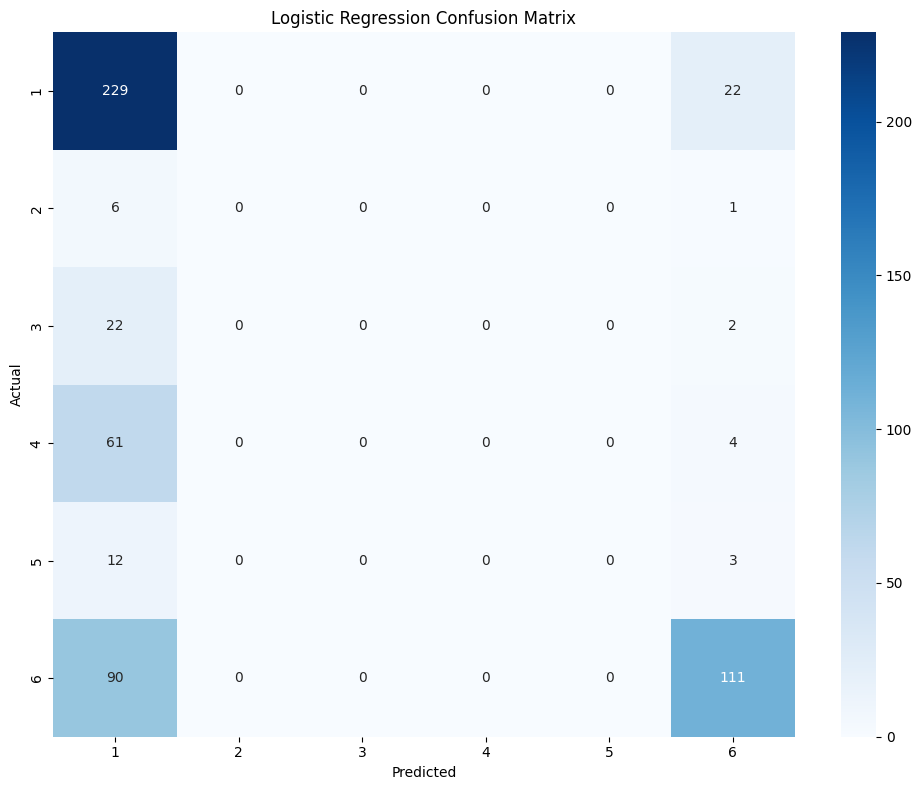


Logistic Regression LIME Explanations:
Prediction error: 'randomforestclassifier'
LIME Explanation Error: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(



Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.73      0.64       251
           2       0.00      0.00      0.00         7
           3       0.12      0.04      0.06        24
           4       0.13      0.08      0.10        65
           5       0.09      0.07      0.08        15
           6       0.66      0.60      0.63       201

    accuracy                           0.55       563
   macro avg       0.26      0.25      0.25       563
weighted avg       0.51      0.55      0.52       563



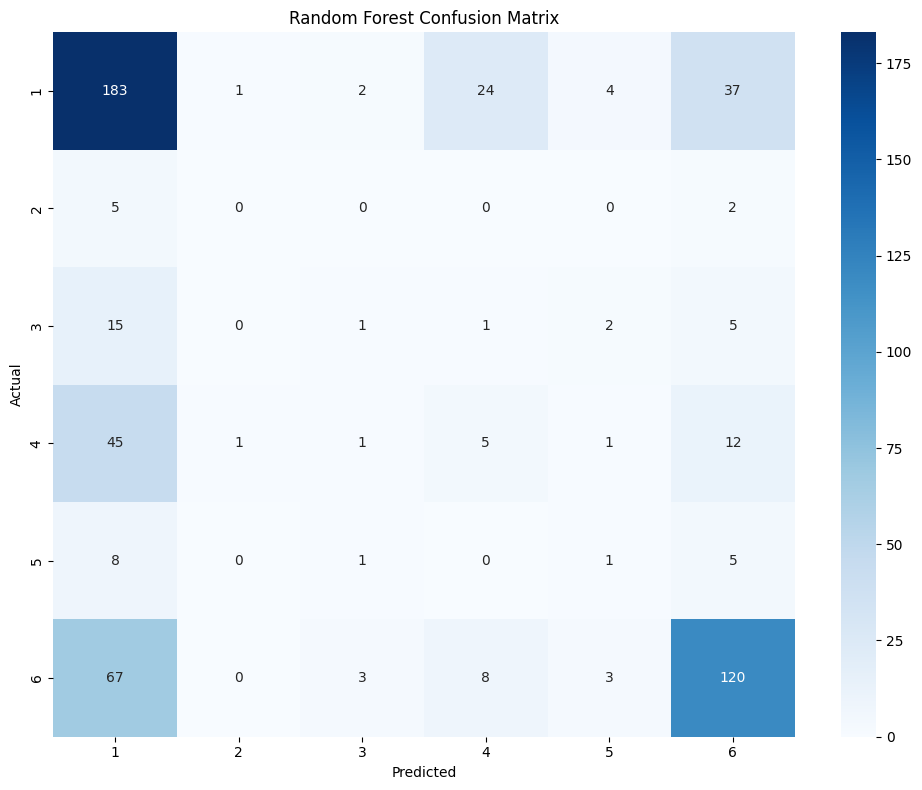


Random Forest LIME Explanations:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


LIME Explanation Error: 1

Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       0.55      0.80      0.65       251
           2       0.00      0.00      0.00         7
           3       0.07      0.04      0.05        24
           4       0.04      0.02      0.02        65
           5       0.25      0.07      0.11        15
           6       0.71      0.53      0.60       201

    accuracy                           0.55       563
   macro avg       0.27      0.24      0.24       563
weighted avg       0.51      0.55      0.51       563



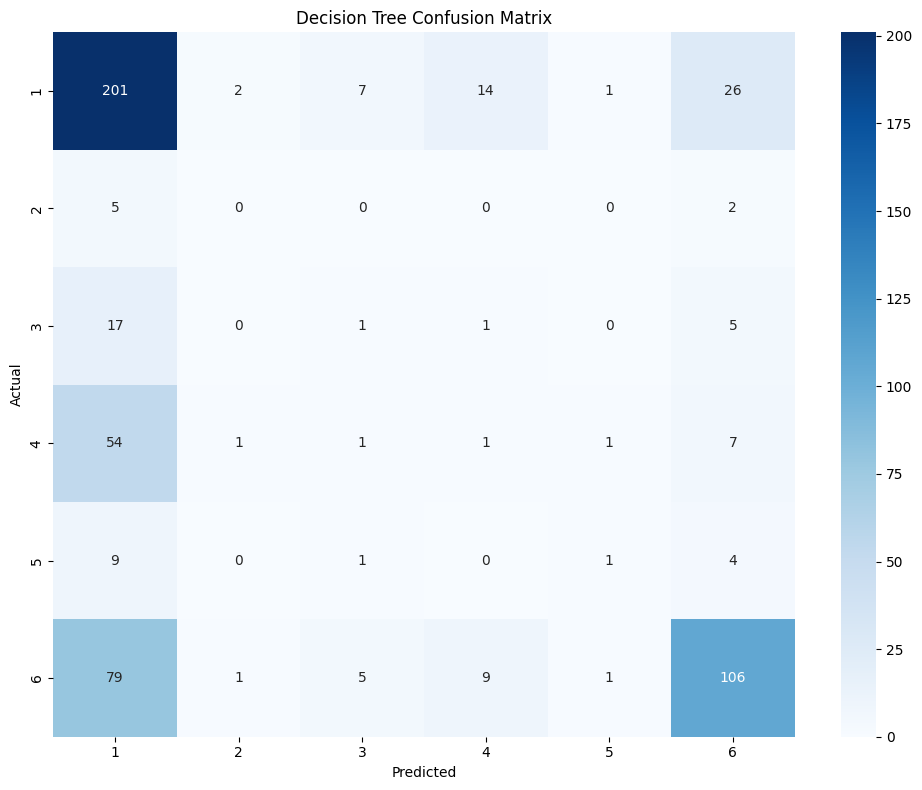


Decision Tree LIME Explanations:
Prediction error: 'randomforestclassifier'


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


LIME Explanation Error: 1

CatBoost Classification Report:
              precision    recall  f1-score   support

           1       0.54      0.82      0.66       251
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        24
           4       0.17      0.03      0.05        65
           5       0.00      0.00      0.00        15
           6       0.73      0.59      0.65       201

    accuracy                           0.58       563
   macro avg       0.24      0.24      0.23       563
weighted avg       0.52      0.58      0.53       563



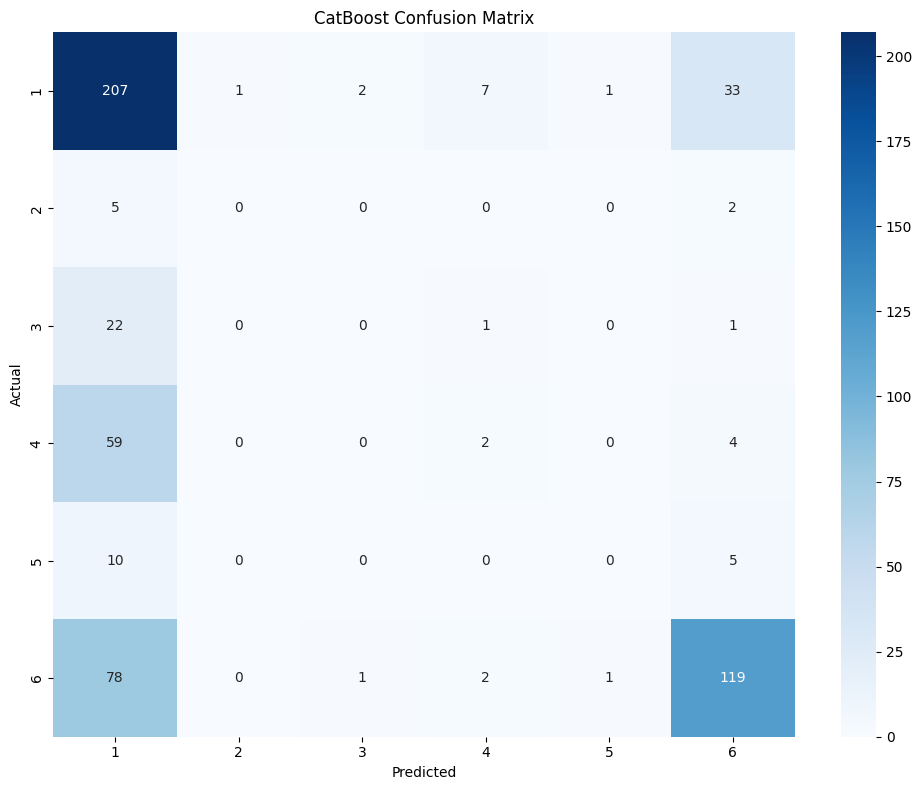


CatBoost LIME Explanations:
Prediction error: 'randomforestclassifier'


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


LIME Explanation Error: 1


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:08:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.82      0.67       251
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        24
           4       0.22      0.03      0.05        65
           5       0.00      0.00      0.00        15
           6       0.68      0.60      0.64       201

    accuracy                           0.59       563
   macro avg       0.24      0.24      0.23       563
weighted avg       0.52      0.59      0.53       563



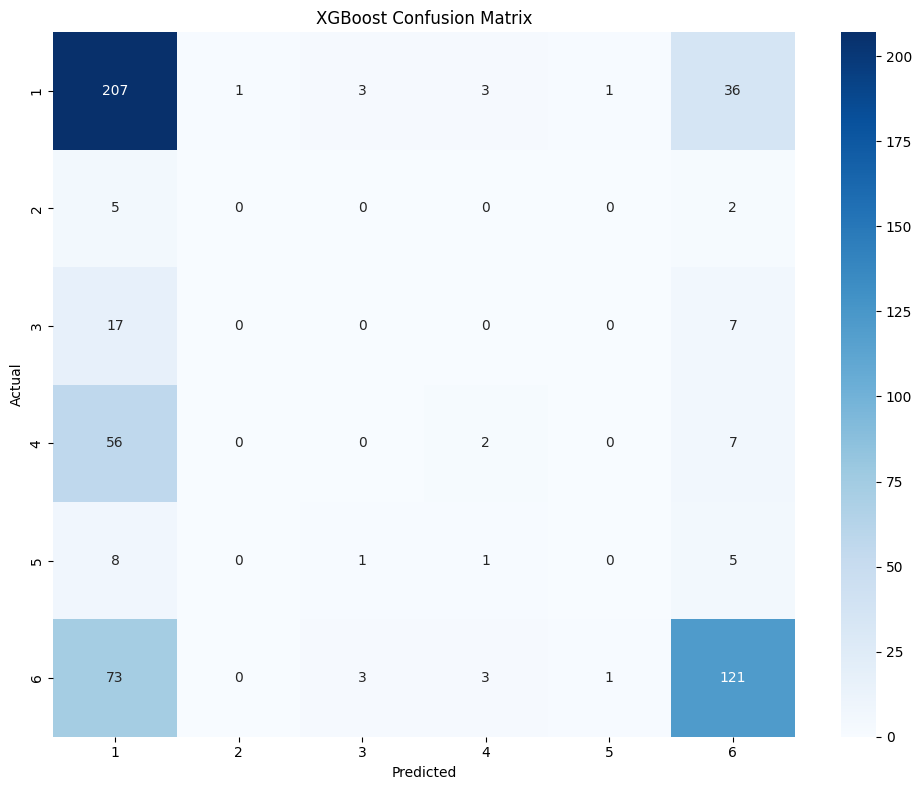


XGBoost LIME Explanations:
Prediction error: 'randomforestclassifier'


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


LIME Explanation Error: 1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc


# Additional libraries for advanced models
from catboost import CatBoostClassifier
import xgboost as xgb
import lime
import lime.lime_tabular

# Load and preprocess data
mortgage = pd.read_csv("/content/state_CO_lei_7H6GLXDRUGQFU57RNE97 (1).csv")

# Select features
features = [
    # 'income',
    'loan_amount',
    'applicant_ethnicity-1',
    'applicant_race-1',
    'applicant_sex'
]

# Convert categorical features to numeric
for col in ['applicant_ethnicity-1', 'applicant_race-1', 'applicant_sex']:
    mortgage[col] = pd.Categorical(mortgage[col]).codes

# Prepare X and y with label encoding
X = mortgage[features]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(mortgage['action_taken'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate and visualize model
def explain_with_custom_lime(model, X_train, X_test, feature_names, class_names):
    def predict_proba(X):
        X = np.atleast_2d(X)
        try:
            # Preprocess and predict
            X_processed = model.named_steps['simpleimputer'].transform(X)
            X_processed = model.named_steps['standardscaler'].transform(X_processed)
            return model.named_steps['randomforestclassifier'].predict_proba(X_processed)
        except Exception as e:
            print(f"Prediction error: {e}")
            pred = model.predict(X)
            proba = np.zeros((X.shape[0], len(class_names)))
            for i, p in enumerate(pred):
                proba[i, p] = 1.0
            return proba

    try:
        # Preprocess data manually to avoid feature name issues
        X_train_processed = model.named_steps['simpleimputer'].transform(X_train)
        X_train_processed = model.named_steps['standardscaler'].transform(X_train_processed)
        X_test_processed = model.named_steps['simpleimputer'].transform(X_test)
        X_test_processed = model.named_steps['standardscaler'].transform(X_test_processed)

        explainer = lime.lime_tabular.LimeTabularExplainer(
            X_train_processed,
            feature_names=feature_names,
            class_names=class_names,
            discretize_continuous=True,
            random_state=42
        )

        explanations = []
        for i in range(min(3, len(X_test_processed))):
            exp = explainer.explain_instance(
                X_test_processed[i],
                predict_proba,
                num_features=len(feature_names),
                top_labels=1
            )
            explanations.append(exp.as_list())
        return explanations
    except Exception as e:
        print(f"LIME Explanation Error: {e}")
        return []

# Update model evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, label_encoder):
    # Fit model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Classification Report
    print(f"\n{model_name} Classification Report:")
    print(classification_report(
        y_test,
        y_pred,
        target_names=label_encoder.classes_.astype(str)
    ))

    # Confusion Matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # LIME Explanations
    print(f"\n{model_name} LIME Explanations:")
    class_names = label_encoder.classes_.astype(str)
    explanations = explain_with_custom_lime(model, X_train, X_test, features, class_names)
    for i, exp in enumerate(explanations):
        print(f"\nInstance {i} Explanation:")
        print(exp)



# Models to evaluate
models = {
    'Logistic Regression': make_pipeline(
        SimpleImputer(strategy='median'),
        StandardScaler(),
        LogisticRegression(solver='liblinear', random_state=42, multi_class='ovr')
    ),
    'Random Forest': make_pipeline(
        SimpleImputer(strategy='median'),
        StandardScaler(),
        RandomForestClassifier(n_estimators=100, random_state=42)
    ),
    'Decision Tree': make_pipeline(
        SimpleImputer(strategy='median'),
        StandardScaler(),
        DecisionTreeClassifier(random_state=42)
    ),
    'CatBoost': make_pipeline(
        SimpleImputer(strategy='median'),
        StandardScaler(),
        CatBoostClassifier(verbose=0, random_seed=42)
    ),
    'XGBoost': make_pipeline(
        SimpleImputer(strategy='median'),
        StandardScaler(),
        xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    )
}

# Evaluate each model
for name, model in models.items():
    evaluate_model(model, X_train, X_test, y_train, y_test, name, label_encoder)


Training Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Simpl


Training Decision Tree...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Simpl


Training CatBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Simpl


Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:08:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not

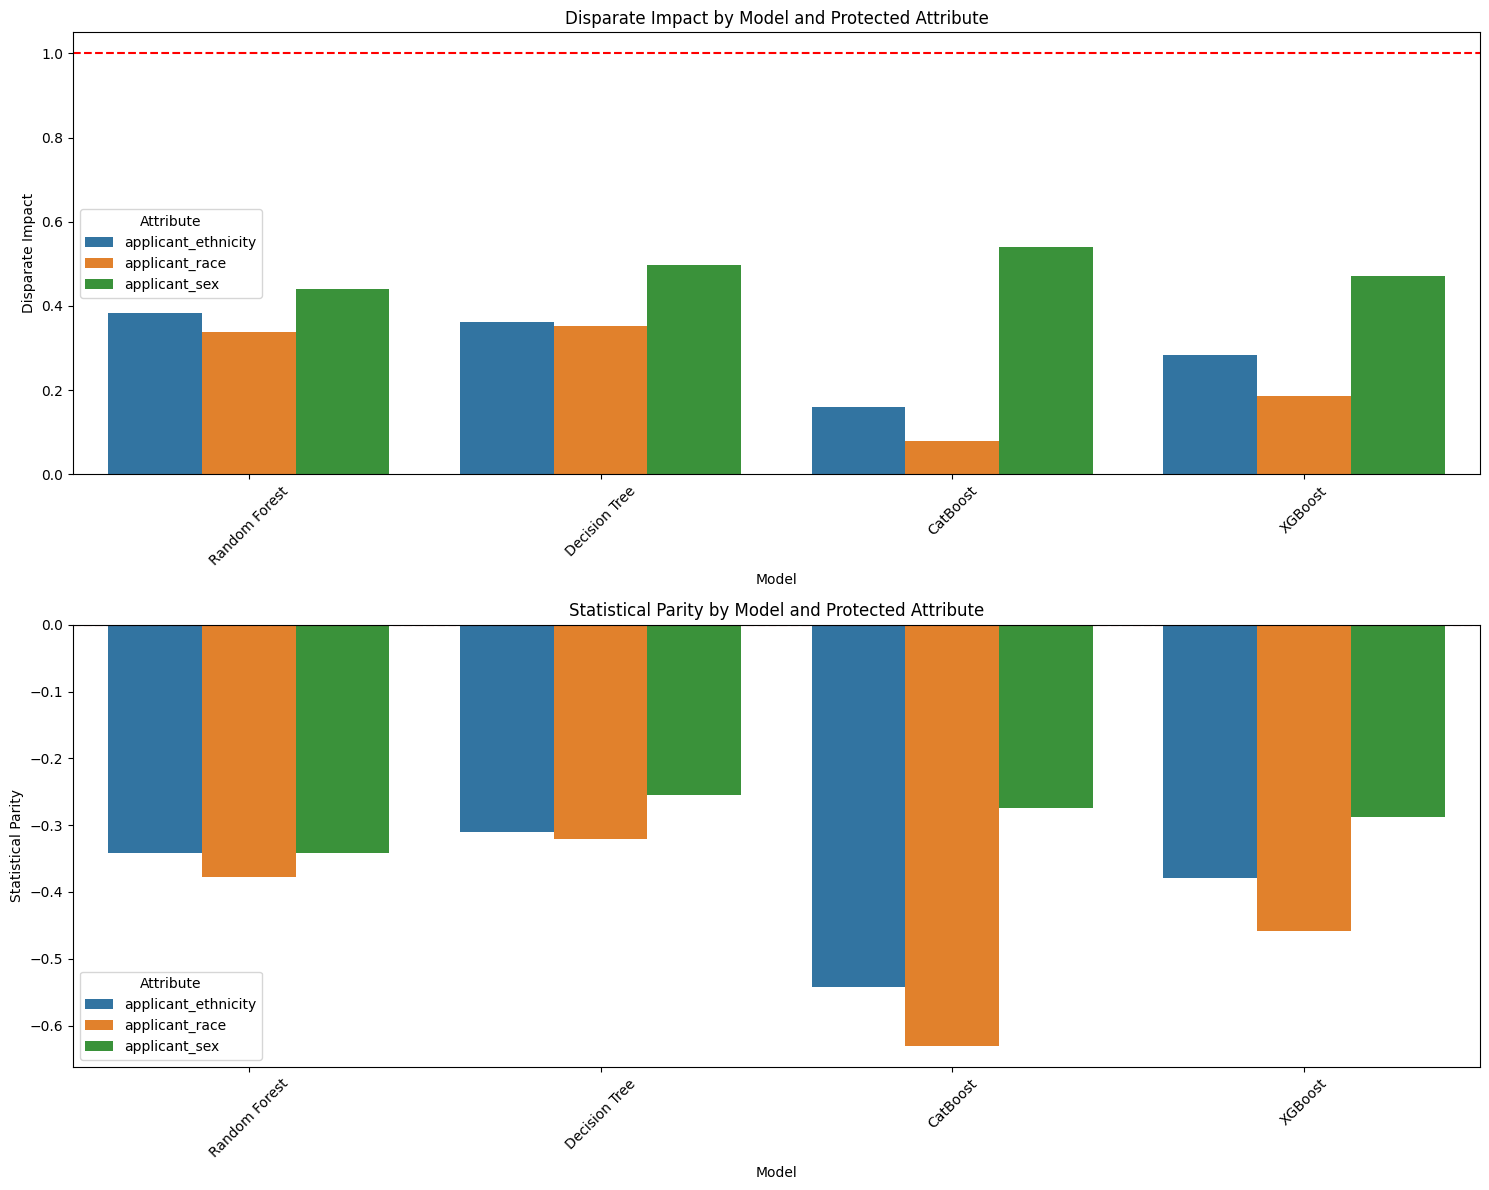


Detailed Fairness Metrics for All Models:

Random Forest:

applicant_ethnicity-1:
Disparate Impact: 0.383
Statistical Parity: -0.342

applicant_race-1:
Disparate Impact: 0.339
Statistical Parity: -0.378

applicant_sex:
Disparate Impact: 0.439
Statistical Parity: -0.342

Decision Tree:

applicant_ethnicity-1:
Disparate Impact: 0.362
Statistical Parity: -0.310

applicant_race-1:
Disparate Impact: 0.352
Statistical Parity: -0.320

applicant_sex:
Disparate Impact: 0.498
Statistical Parity: -0.255

CatBoost:

applicant_ethnicity-1:
Disparate Impact: 0.160
Statistical Parity: -0.542

applicant_race-1:
Disparate Impact: 0.080
Statistical Parity: -0.630

applicant_sex:
Disparate Impact: 0.541
Statistical Parity: -0.275

XGBoost:

applicant_ethnicity-1:
Disparate Impact: 0.284
Statistical Parity: -0.379

applicant_race-1:
Disparate Impact: 0.185
Statistical Parity: -0.459

applicant_sex:
Disparate Impact: 0.472
Statistical Parity: -0.288

LIME Explanations for Random Forest:


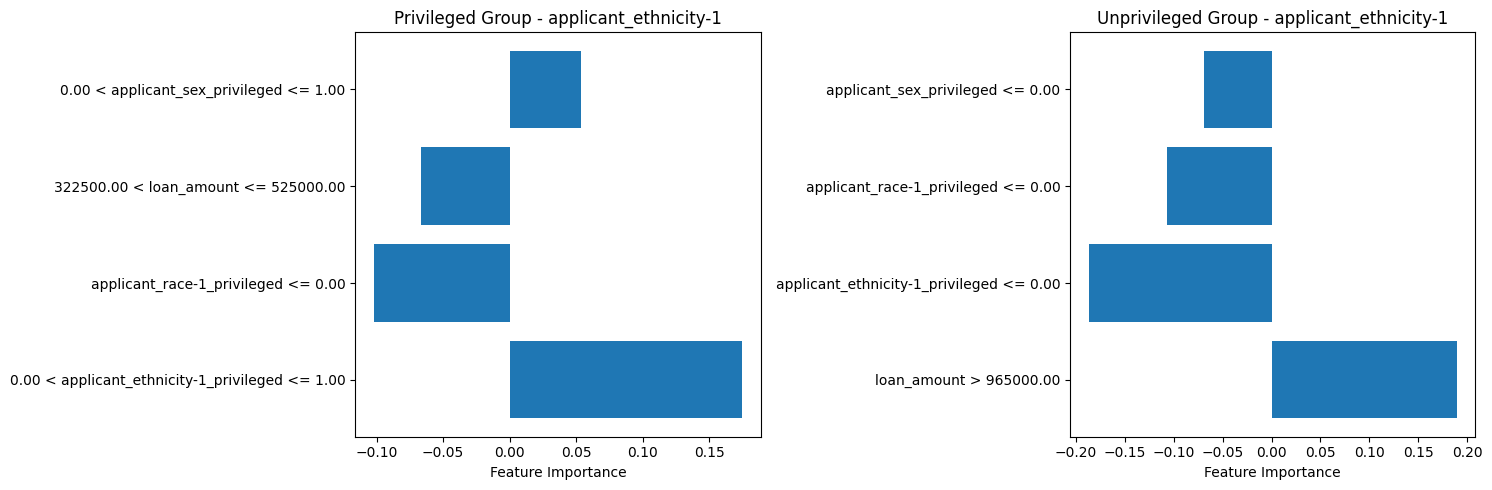


applicant_ethnicity-1:

Privileged Group Explanation:
0.00 < applicant_ethnicity-1_privileged <= 1.00: 0.1748
applicant_race-1_privileged <= 0.00: -0.1020
322500.00 < loan_amount <= 525000.00: -0.0669
0.00 < applicant_sex_privileged <= 1.00: 0.0533

Unprivileged Group Explanation:
loan_amount > 965000.00: 0.1895
applicant_ethnicity-1_privileged <= 0.00: -0.1873
applicant_race-1_privileged <= 0.00: -0.1073
applicant_sex_privileged <= 0.00: -0.0692


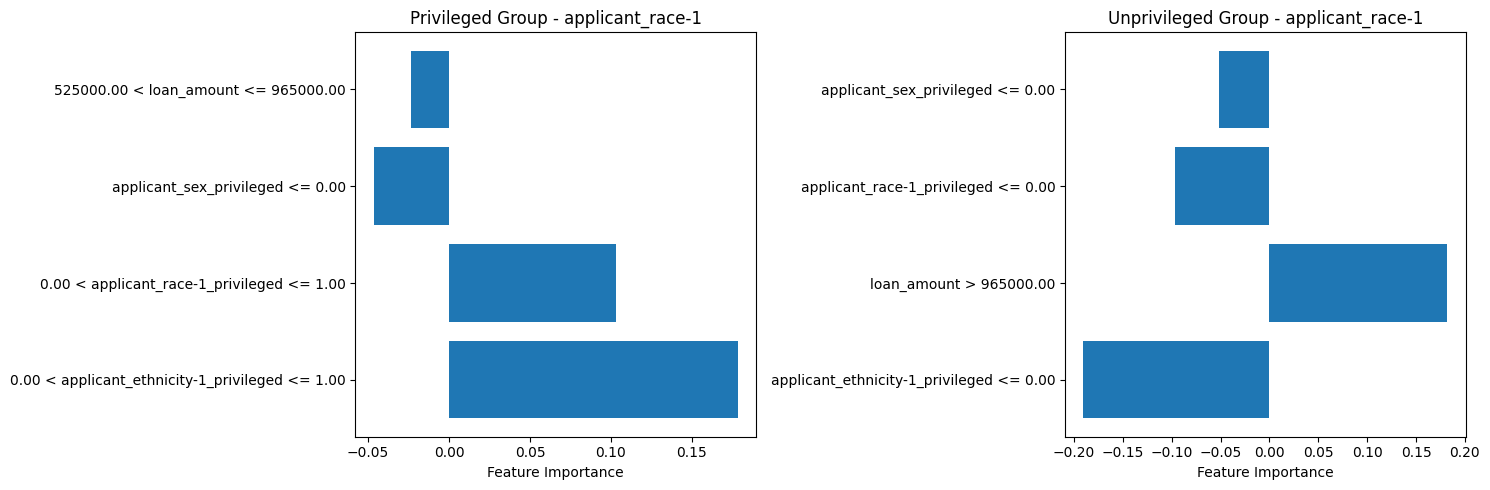


applicant_race-1:

Privileged Group Explanation:
0.00 < applicant_ethnicity-1_privileged <= 1.00: 0.1783
0.00 < applicant_race-1_privileged <= 1.00: 0.1034
applicant_sex_privileged <= 0.00: -0.0466
525000.00 < loan_amount <= 965000.00: -0.0238

Unprivileged Group Explanation:
applicant_ethnicity-1_privileged <= 0.00: -0.1902
loan_amount > 965000.00: 0.1821
applicant_race-1_privileged <= 0.00: -0.0970
applicant_sex_privileged <= 0.00: -0.0517


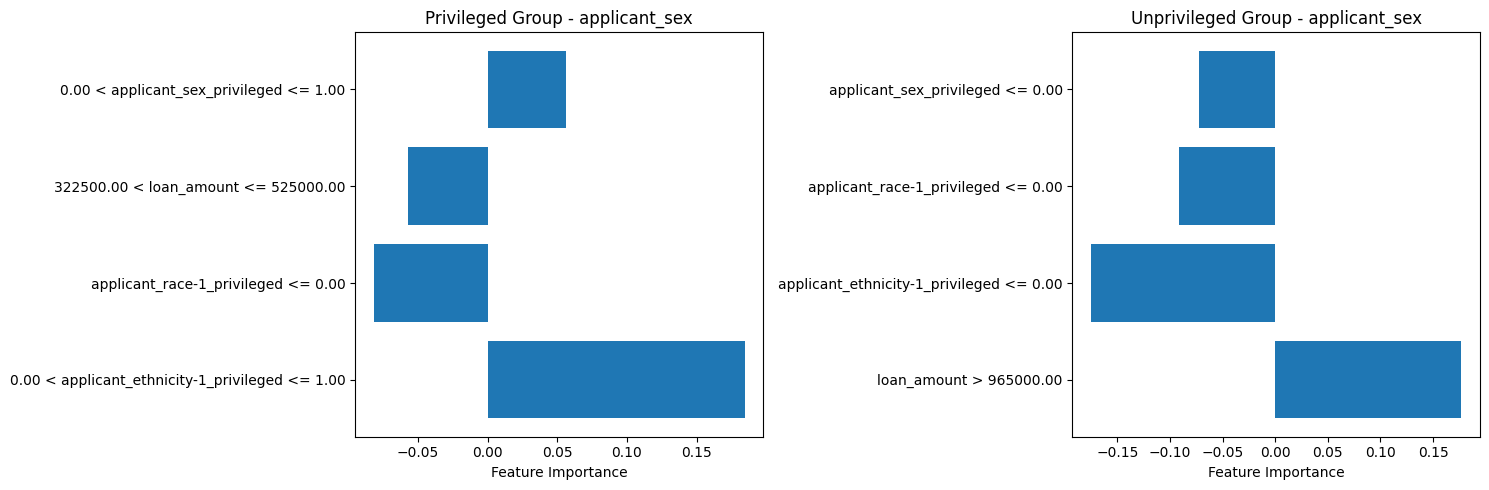


applicant_sex:

Privileged Group Explanation:
0.00 < applicant_ethnicity-1_privileged <= 1.00: 0.1843
applicant_race-1_privileged <= 0.00: -0.0815
322500.00 < loan_amount <= 525000.00: -0.0571
0.00 < applicant_sex_privileged <= 1.00: 0.0562

Unprivileged Group Explanation:
loan_amount > 965000.00: 0.1771
applicant_ethnicity-1_privileged <= 0.00: -0.1751
applicant_race-1_privileged <= 0.00: -0.0915
applicant_sex_privileged <= 0.00: -0.0723

LIME Explanations for Decision Tree:


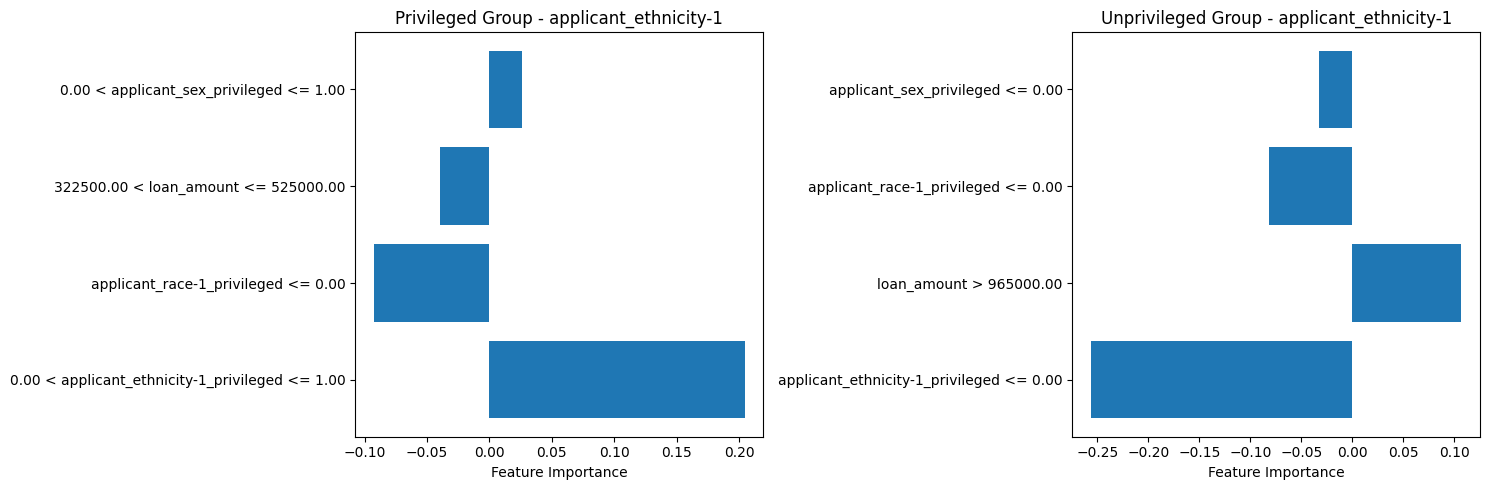


applicant_ethnicity-1:

Privileged Group Explanation:
0.00 < applicant_ethnicity-1_privileged <= 1.00: 0.2045
applicant_race-1_privileged <= 0.00: -0.0925
322500.00 < loan_amount <= 525000.00: -0.0397
0.00 < applicant_sex_privileged <= 1.00: 0.0260

Unprivileged Group Explanation:
applicant_ethnicity-1_privileged <= 0.00: -0.2564
loan_amount > 965000.00: 0.1073
applicant_race-1_privileged <= 0.00: -0.0818
applicant_sex_privileged <= 0.00: -0.0323


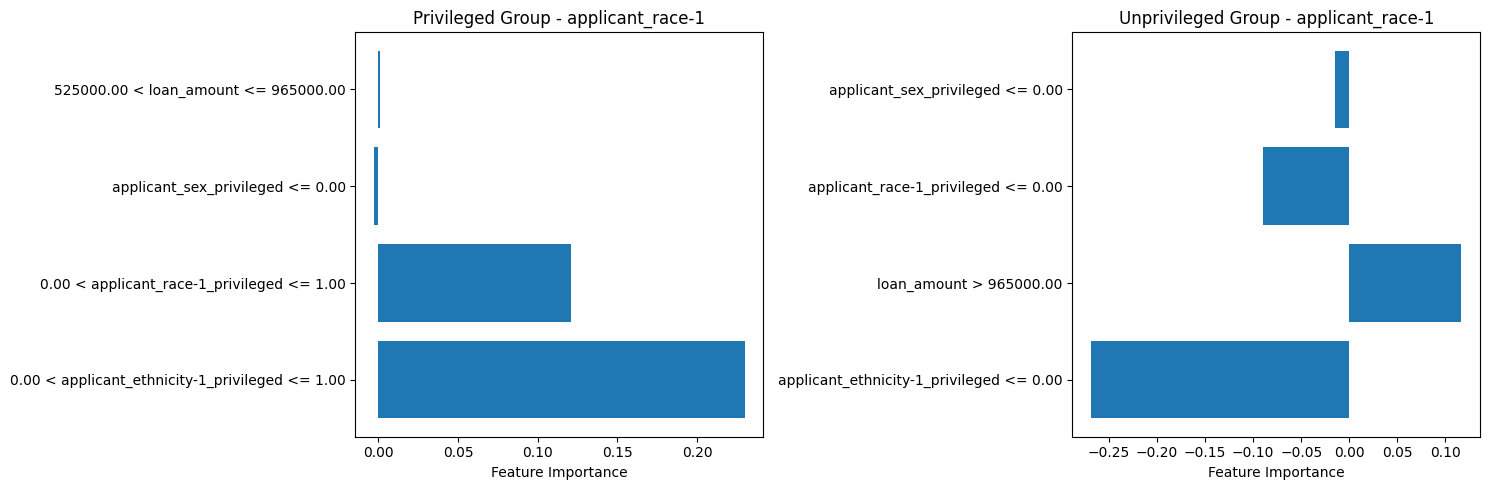


applicant_race-1:

Privileged Group Explanation:
0.00 < applicant_ethnicity-1_privileged <= 1.00: 0.2297
0.00 < applicant_race-1_privileged <= 1.00: 0.1205
applicant_sex_privileged <= 0.00: -0.0028
525000.00 < loan_amount <= 965000.00: 0.0008

Unprivileged Group Explanation:
applicant_ethnicity-1_privileged <= 0.00: -0.2688
loan_amount > 965000.00: 0.1168
applicant_race-1_privileged <= 0.00: -0.0897
applicant_sex_privileged <= 0.00: -0.0144


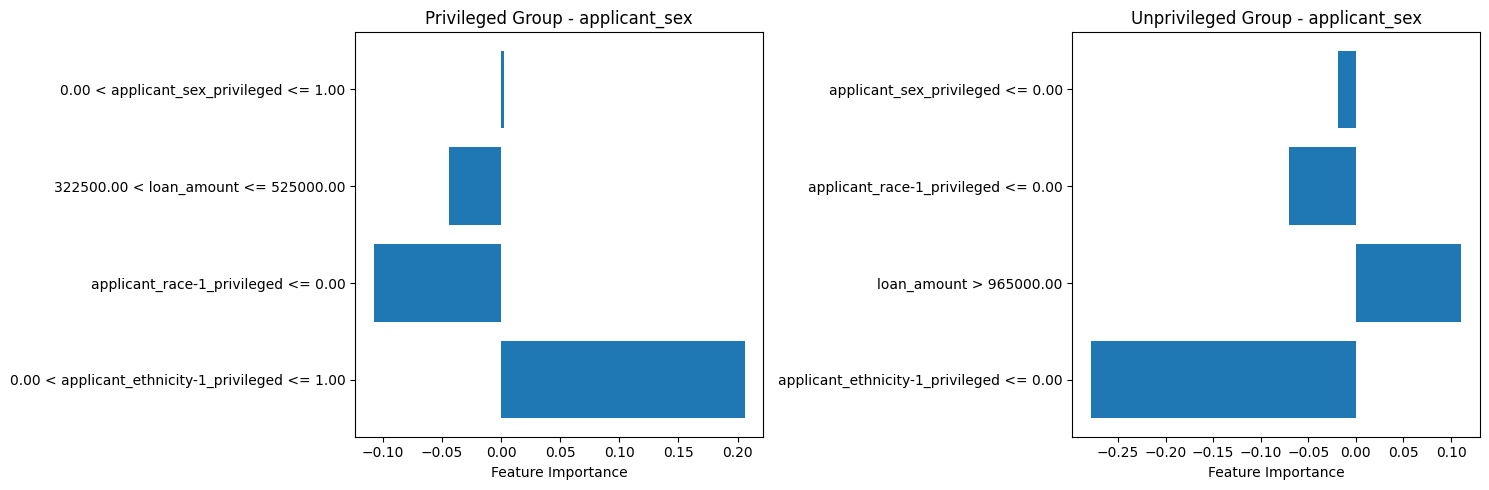


applicant_sex:

Privileged Group Explanation:
0.00 < applicant_ethnicity-1_privileged <= 1.00: 0.2058
applicant_race-1_privileged <= 0.00: -0.1074
322500.00 < loan_amount <= 525000.00: -0.0438
0.00 < applicant_sex_privileged <= 1.00: 0.0025

Unprivileged Group Explanation:
applicant_ethnicity-1_privileged <= 0.00: -0.2785
loan_amount > 965000.00: 0.1109
applicant_race-1_privileged <= 0.00: -0.0702
applicant_sex_privileged <= 0.00: -0.0184

LIME Explanations for CatBoost:


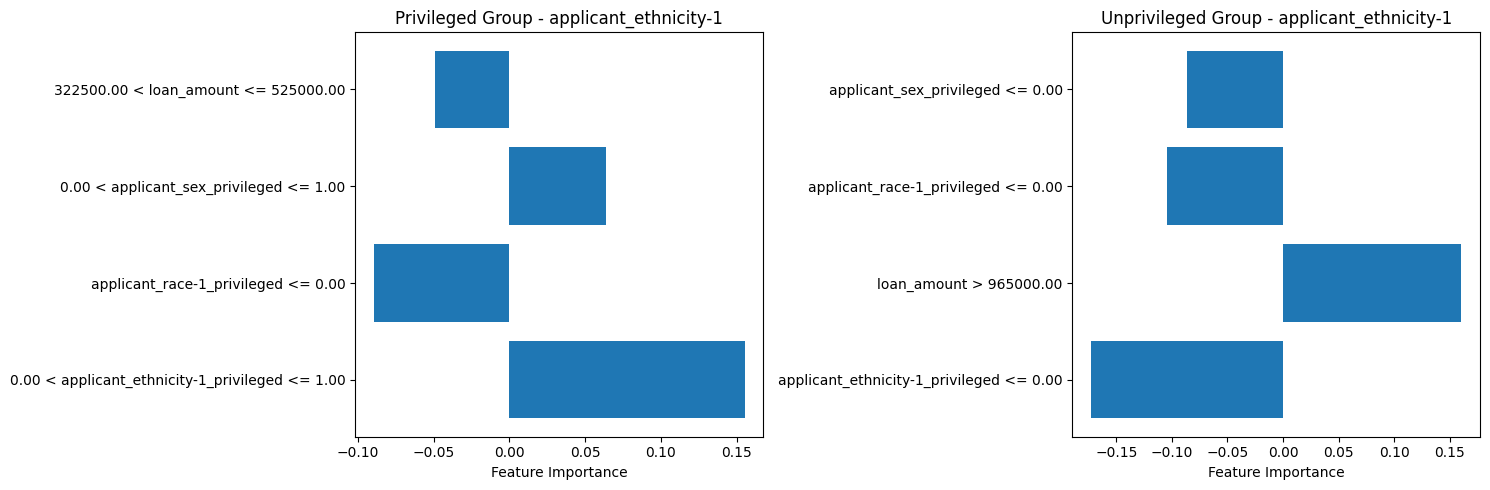


applicant_ethnicity-1:

Privileged Group Explanation:
0.00 < applicant_ethnicity-1_privileged <= 1.00: 0.1553
applicant_race-1_privileged <= 0.00: -0.0893
0.00 < applicant_sex_privileged <= 1.00: 0.0638
322500.00 < loan_amount <= 525000.00: -0.0489

Unprivileged Group Explanation:
applicant_ethnicity-1_privileged <= 0.00: -0.1730
loan_amount > 965000.00: 0.1607
applicant_race-1_privileged <= 0.00: -0.1041
applicant_sex_privileged <= 0.00: -0.0868


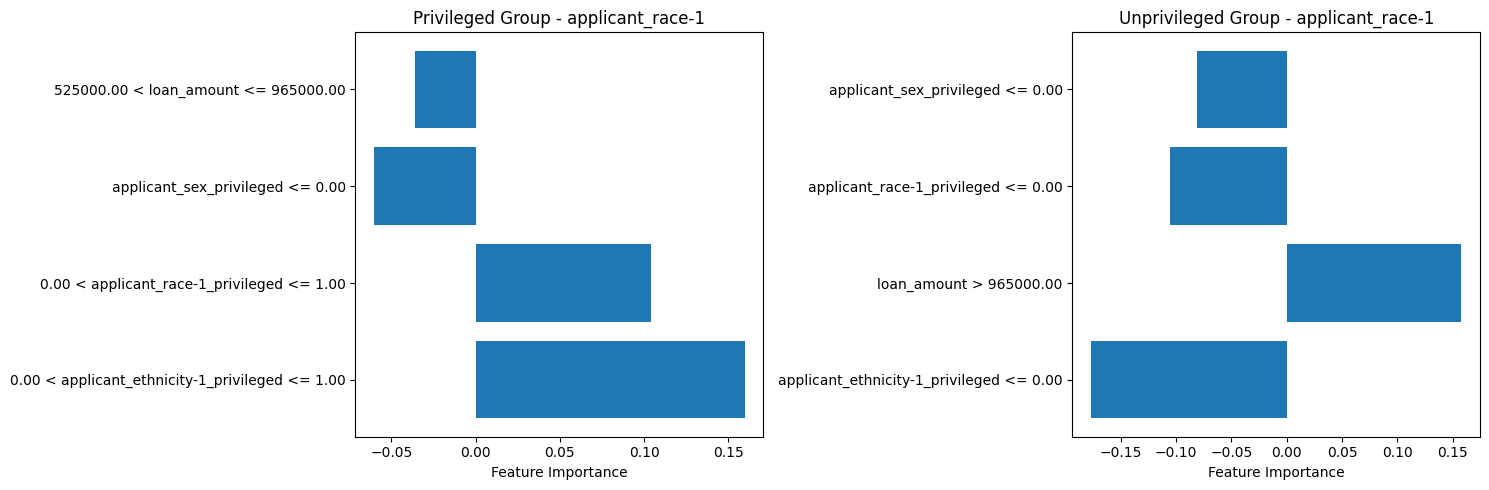


applicant_race-1:

Privileged Group Explanation:
0.00 < applicant_ethnicity-1_privileged <= 1.00: 0.1596
0.00 < applicant_race-1_privileged <= 1.00: 0.1038
applicant_sex_privileged <= 0.00: -0.0603
525000.00 < loan_amount <= 965000.00: -0.0360

Unprivileged Group Explanation:
applicant_ethnicity-1_privileged <= 0.00: -0.1768
loan_amount > 965000.00: 0.1579
applicant_race-1_privileged <= 0.00: -0.1054
applicant_sex_privileged <= 0.00: -0.0807


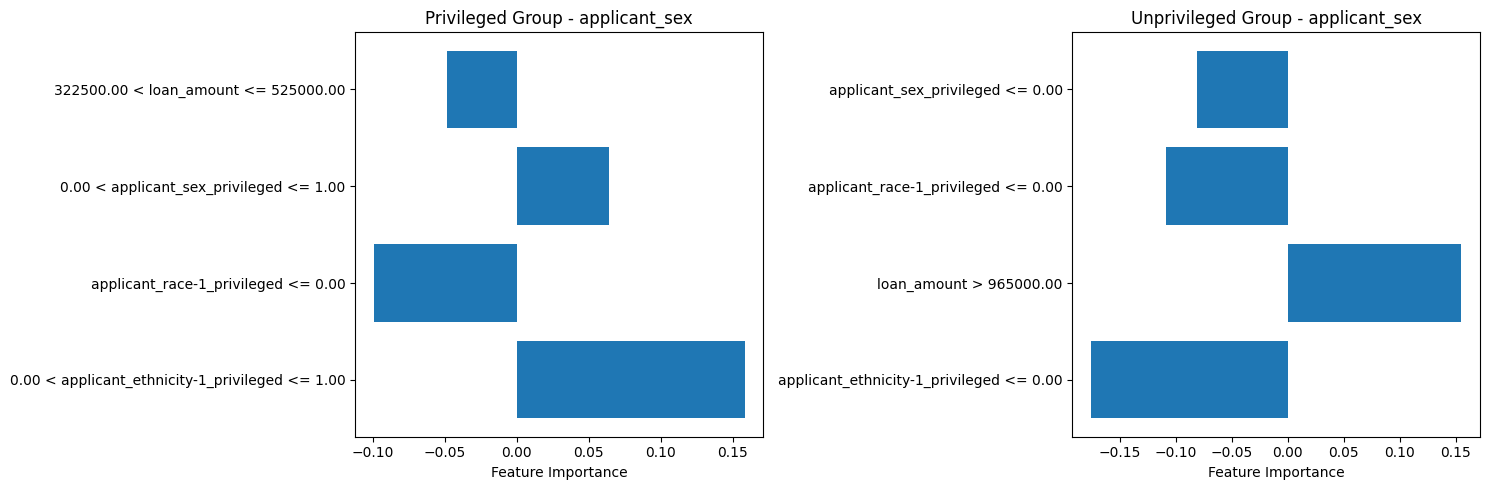


applicant_sex:

Privileged Group Explanation:
0.00 < applicant_ethnicity-1_privileged <= 1.00: 0.1583
applicant_race-1_privileged <= 0.00: -0.0991
0.00 < applicant_sex_privileged <= 1.00: 0.0641
322500.00 < loan_amount <= 525000.00: -0.0486

Unprivileged Group Explanation:
applicant_ethnicity-1_privileged <= 0.00: -0.1761
loan_amount > 965000.00: 0.1553
applicant_race-1_privileged <= 0.00: -0.1088
applicant_sex_privileged <= 0.00: -0.0815

LIME Explanations for XGBoost:


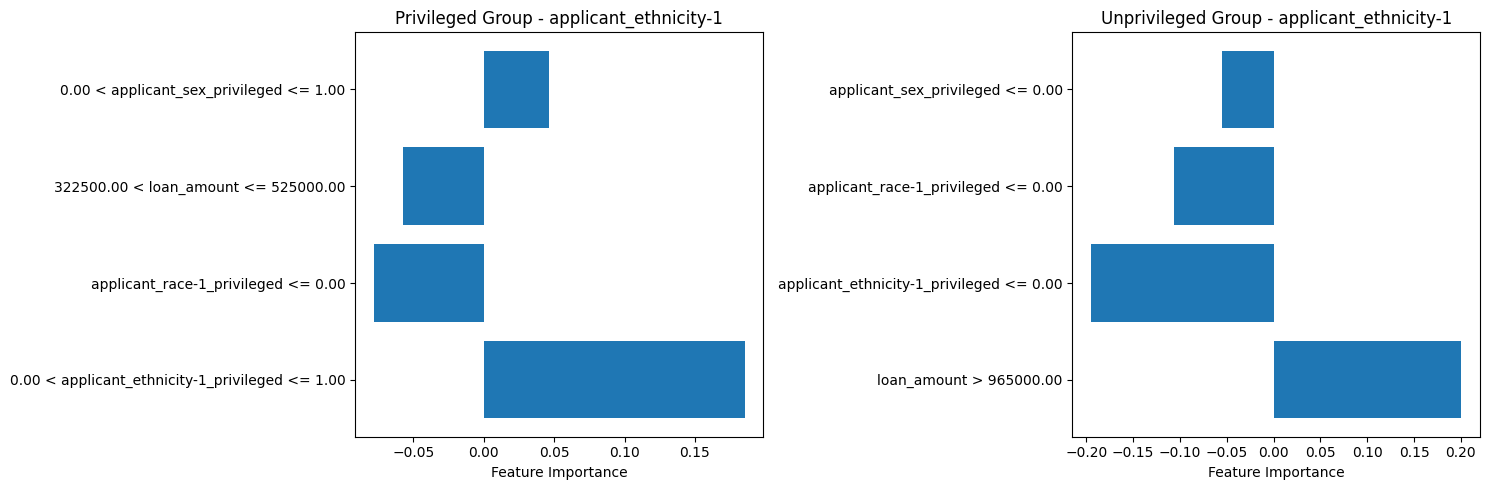


applicant_ethnicity-1:

Privileged Group Explanation:
0.00 < applicant_ethnicity-1_privileged <= 1.00: 0.1852
applicant_race-1_privileged <= 0.00: -0.0778
322500.00 < loan_amount <= 525000.00: -0.0569
0.00 < applicant_sex_privileged <= 1.00: 0.0465

Unprivileged Group Explanation:
loan_amount > 965000.00: 0.2006
applicant_ethnicity-1_privileged <= 0.00: -0.1951
applicant_race-1_privileged <= 0.00: -0.1059
applicant_sex_privileged <= 0.00: -0.0552


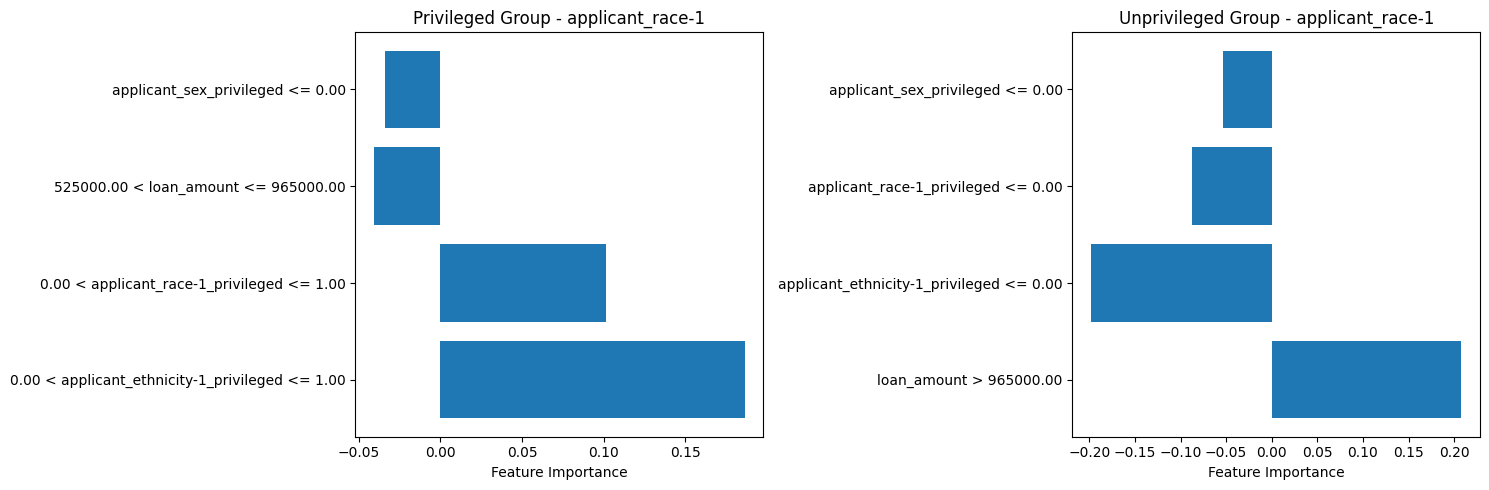


applicant_race-1:

Privileged Group Explanation:
0.00 < applicant_ethnicity-1_privileged <= 1.00: 0.1863
0.00 < applicant_race-1_privileged <= 1.00: 0.1015
525000.00 < loan_amount <= 965000.00: -0.0407
applicant_sex_privileged <= 0.00: -0.0337

Unprivileged Group Explanation:
loan_amount > 965000.00: 0.2080
applicant_ethnicity-1_privileged <= 0.00: -0.1982
applicant_race-1_privileged <= 0.00: -0.0877
applicant_sex_privileged <= 0.00: -0.0534


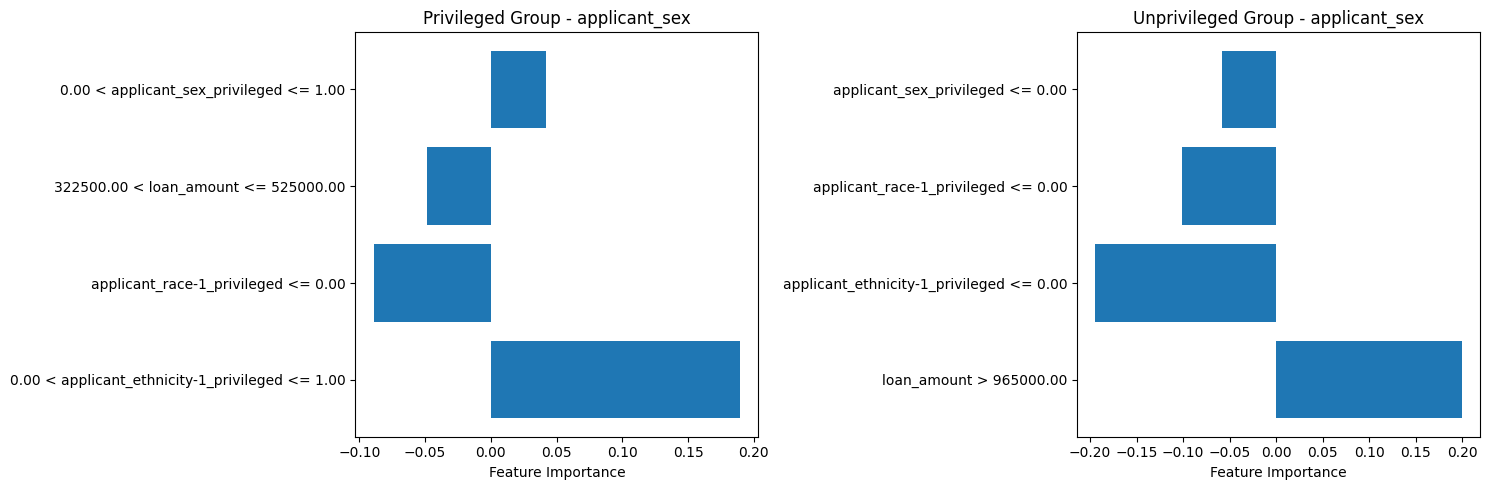


applicant_sex:

Privileged Group Explanation:
0.00 < applicant_ethnicity-1_privileged <= 1.00: 0.1896
applicant_race-1_privileged <= 0.00: -0.0890
322500.00 < loan_amount <= 525000.00: -0.0489
0.00 < applicant_sex_privileged <= 1.00: 0.0417

Unprivileged Group Explanation:
loan_amount > 965000.00: 0.1995
applicant_ethnicity-1_privileged <= 0.00: -0.1943
applicant_race-1_privileged <= 0.00: -0.1015
applicant_sex_privileged <= 0.00: -0.0581


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
import lime
import lime.lime_tabular

class MultiModelFairnessAnalyzer:
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.protected_attributes = ['applicant_ethnicity-1', 'applicant_race-1', 'applicant_sex']
        self.models = {
            'Random Forest': make_pipeline(
                SimpleImputer(strategy='median'),
                StandardScaler(),
                RandomForestClassifier(n_estimators=100, random_state=42)
            ),
            'Decision Tree': make_pipeline(
                SimpleImputer(strategy='median'),
                StandardScaler(),
                DecisionTreeClassifier(random_state=42)
            ),
            'CatBoost': make_pipeline(
                SimpleImputer(strategy='median'),
                StandardScaler(),
                CatBoostClassifier(verbose=0, random_seed=42)
            ),
            'XGBoost': make_pipeline(
                SimpleImputer(strategy='median'),
                StandardScaler(),
                xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
            )
        }

    def calculate_fairness_metrics(self, y_pred, protected_attributes):
        """Calculate fairness metrics"""
        y_pred = np.array(y_pred)
        protected_attributes = np.array(protected_attributes)

        # Calculate disparate impact
        unpriv_mask = (protected_attributes == 0)
        priv_mask = (protected_attributes == 1)

        if not any(priv_mask) or not any(unpriv_mask):
            return {'disparate_impact': np.nan, 'statistical_parity': np.nan}

        unpriv_pos = np.mean(y_pred[unpriv_mask])
        priv_pos = np.mean(y_pred[priv_mask])

        disparate_impact = unpriv_pos / priv_pos if priv_pos > 0 else np.nan
        statistical_parity = unpriv_pos - priv_pos

        return {
            'disparate_impact': disparate_impact,
            'statistical_parity': statistical_parity
        }

    def preprocess_data(self):
        """Preprocess the data"""
        # Create binary outcome
        self.data['action_taken'] = (self.data['action_taken'] == 1).astype(int)

        # Create binary encodings for protected attributes
        for attr in self.protected_attributes:
            self.data[attr] = self.data[attr].astype(str)

            if attr == 'applicant_ethnicity-1':
                self.data[f'{attr}_privileged'] = (self.data[attr] == '2').astype(int)
            elif attr == 'applicant_race-1':
                self.data[f'{attr}_privileged'] = (self.data[attr] == '5').astype(int)
            elif attr == 'applicant_sex':
                self.data[f'{attr}_privileged'] = (self.data[attr] == '1').astype(int)

        # Select features
        numeric_features = ['loan_amount']
        privilege_features = [f'{attr}_privileged' for attr in self.protected_attributes]
        self.features = numeric_features + privilege_features

        # Prepare X and y
        X = self.data[self.features].copy()
        y = self.data['action_taken']

        return train_test_split(X, y, test_size=0.2, random_state=42)

    # def generate_lime_explanations(self, model, X_train, X_test, model_name):
    #     """Generate LIME explanations for each protected attribute"""
    #     explainer = lime.lime_tabular.LimeTabularExplainer(
    #         X_train.values,
    #         feature_names=X_train.columns,
    #         class_names=['Denied', 'Approved'],
    #         mode='classification'
    #     )

    #     lime_explanations = {}

    #     for attr in self.protected_attributes:
    #         priv_mask = X_test[f'{attr}_privileged'] == 1
    #         unpriv_mask = X_test[f'{attr}_privileged'] == 0

    #         priv_example = X_test[priv_mask].iloc[0] if any(priv_mask) else None
    #         unpriv_example = X_test[unpriv_mask].iloc[0] if any(unpriv_mask) else None

    #         explanations = {
    #             'privileged': explainer.explain_instance(
    #                 priv_example.values,
    #                 model.predict_proba,
    #                 num_features=len(self.features)
    #             ) if priv_example is not None else None,

    #             'unprivileged': explainer.explain_instance(
    #                 unpriv_example.values,
    #                 model.predict_proba,
    #                 num_features=len(self.features)
    #             ) if unpriv_example is not None else None
    #         }

    #         lime_explanations[attr] = explanations

    #     return lime_explanations

    def visualize_model_results(self, all_results):
        """Visualize fairness metrics for all models"""
        # Prepare data for visualization
        plot_data = []
        for model_name, results in all_results.items():
            for attr in self.protected_attributes:
                metrics = results['fairness_metrics'][attr]
                plot_data.append({
                    'Model': model_name,
                    'Attribute': attr.replace('-1', ''),
                    'Disparate Impact': metrics['disparate_impact'],
                    'Statistical Parity': metrics['statistical_parity']
                })

        plot_df = pd.DataFrame(plot_data)

        # Create subplots for each metric
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

        # Plot Disparate Impact
        sns.barplot(data=plot_df, x='Model', y='Disparate Impact', hue='Attribute', ax=ax1)
        ax1.set_title('Disparate Impact by Model and Protected Attribute')
        ax1.axhline(y=1.0, color='r', linestyle='--', label='Equal Impact')
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

        # Plot Statistical Parity
        sns.barplot(data=plot_df, x='Model', y='Statistical Parity', hue='Attribute', ax=ax2)
        ax2.set_title('Statistical Parity by Model and Protected Attribute')
        ax2.axhline(y=0.0, color='r', linestyle='--', label='Equal Parity')
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

        plt.tight_layout()
        plt.show()

        # Print detailed metrics
        print("\nDetailed Fairness Metrics for All Models:")
        for model_name, results in all_results.items():
            print(f"\n{model_name}:")
            for attr in self.protected_attributes:
                metrics = results['fairness_metrics'][attr]
                print(f"\n{attr}:")
                print(f"Disparate Impact: {metrics['disparate_impact']:.3f}")
                print(f"Statistical Parity: {metrics['statistical_parity']:.3f}")


    def visualize_lime_explanations(self, lime_explanations, model_name):
        """Visualize LIME explanations for a specific model"""
        print(f"\nLIME Explanations for {model_name}:")

        for attr in self.protected_attributes:
            explanations = lime_explanations[attr]

            # Create figure for plotting
            plt.figure(figsize=(15, 5))

            # Plot for privileged group
            plt.subplot(1, 2, 1)
            if explanations['privileged'] is not None:
                # Get explanation data
                exp_list = explanations['privileged'].as_list()
                features, values = zip(*exp_list)

                # Create horizontal bar plot
                y_pos = np.arange(len(features))
                plt.barh(y_pos, values)
                plt.yticks(y_pos, features)
                plt.title(f'Privileged Group - {attr}')
                plt.xlabel('Feature Importance')
            else:
                plt.text(0.5, 0.5, 'No privileged examples found',
                        horizontalalignment='center')

            # Plot for unprivileged group
            plt.subplot(1, 2, 2)
            if explanations['unprivileged'] is not None:
                # Get explanation data
                exp_list = explanations['unprivileged'].as_list()
                features, values = zip(*exp_list)

                # Create horizontal bar plot
                y_pos = np.arange(len(features))
                plt.barh(y_pos, values)
                plt.yticks(y_pos, features)
                plt.title(f'Unprivileged Group - {attr}')
                plt.xlabel('Feature Importance')
            else:
                plt.text(0.5, 0.5, 'No unprivileged examples found',
                        horizontalalignment='center')

            plt.tight_layout()
            plt.show()

            # Print detailed explanation
            print(f"\n{attr}:")
            print("\nPrivileged Group Explanation:")
            if explanations['privileged'] is not None:
                for feature, importance in explanations['privileged'].as_list():
                    print(f"{feature}: {importance:.4f}")

            print("\nUnprivileged Group Explanation:")
            if explanations['unprivileged'] is not None:
                for feature, importance in explanations['unprivileged'].as_list():
                    print(f"{feature}: {importance:.4f}")

    def generate_lime_explanations(self, model, X_train, X_test, model_name):
        """Generate LIME explanations for each protected attribute"""
        explainer = lime.lime_tabular.LimeTabularExplainer(
            X_train.values,
            feature_names=X_train.columns,
            class_names=['Denied', 'Approved'],
            mode='classification'
        )

        lime_explanations = {}

        for attr in self.protected_attributes:
            priv_mask = X_test[f'{attr}_privileged'] == 1
            unpriv_mask = X_test[f'{attr}_privileged'] == 0

            try:
                priv_example = X_test[priv_mask].iloc[0] if any(priv_mask) else None
                unpriv_example = X_test[unpriv_mask].iloc[0] if any(unpriv_mask) else None

                explanations = {
                    'privileged': explainer.explain_instance(
                        priv_example.values,
                        model.predict_proba,
                        num_features=len(self.features)
                    ) if priv_example is not None else None,

                    'unprivileged': explainer.explain_instance(
                        unpriv_example.values,
                        model.predict_proba,
                        num_features=len(self.features)
                    ) if unpriv_example is not None else None
                }

            except Exception as e:
                print(f"Error generating LIME explanation for {model_name}, {attr}: {str(e)}")
                explanations = {'privileged': None, 'unprivileged': None}

            lime_explanations[attr] = explanations

        return lime_explanations

    def run_analysis(self):
        """Run the complete analysis for all models"""
        X_train, X_test, y_train, y_test = self.preprocess_data()

        all_results = {}

        for model_name, model in self.models.items():
            print(f"\nTraining {model_name}...")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # Calculate fairness metrics
            fairness_results = {}
            for attr in self.protected_attributes:
                fairness_results[attr] = self.calculate_fairness_metrics(
                    y_pred, X_test[f'{attr}_privileged'])

            # Generate LIME explanations
            lime_explanations = self.generate_lime_explanations(model, X_train, X_test, model_name)

            all_results[model_name] = {
                'model': model,
                'predictions': y_pred,
                'fairness_metrics': fairness_results,
                'lime_explanations': lime_explanations
            }

        # Visualize results
        self.visualize_model_results(all_results)

        # Visualize LIME explanations for each model
        for model_name, results in all_results.items():
            self.visualize_lime_explanations(results['lime_explanations'], model_name)

        return all_results

# Run the analysis
analyzer = MultiModelFairnessAnalyzer("/content/state_CO_lei_7H6GLXDRUGQFU57RNE97 (1).csv")
results = analyzer.run_analysis()

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 268
[LightGBM] [Info] Number of data points in the train set: 2248, number of used features: 4
[LightGBM] [Info] Start training from score -0.845668
[LightGBM] [Info] Start training from score -4.673274
[LightGBM] [Info] Start training from score -2.922006
[LightGBM] [Info] Start training from score -2.212465
[LightGBM] [Info] Start training from score -3.217987
[LightGBM] [Info] Start training from score -1.026954
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

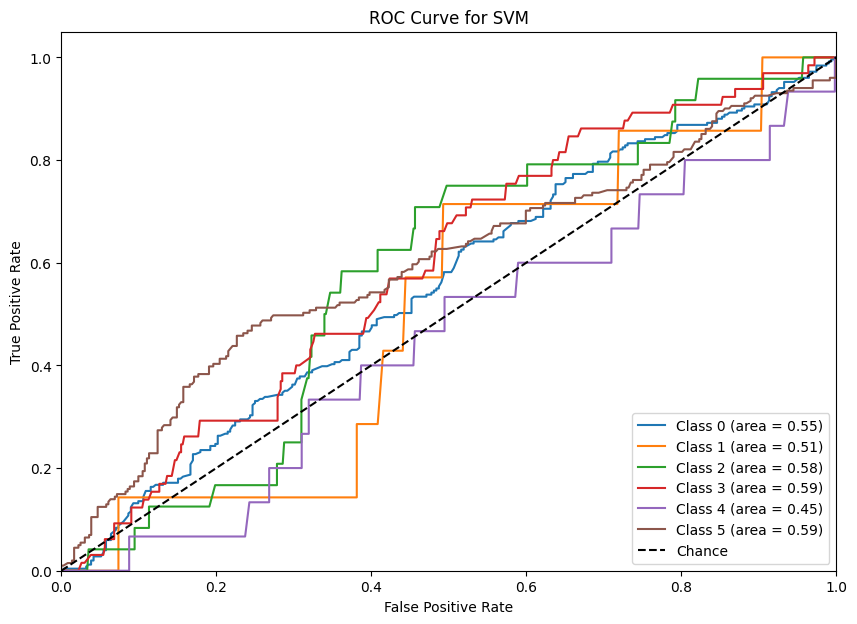

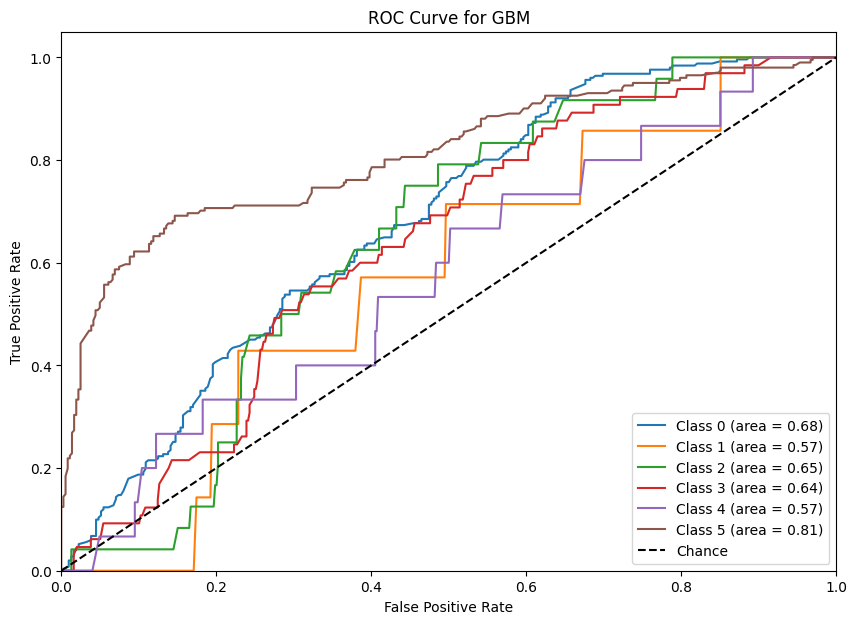

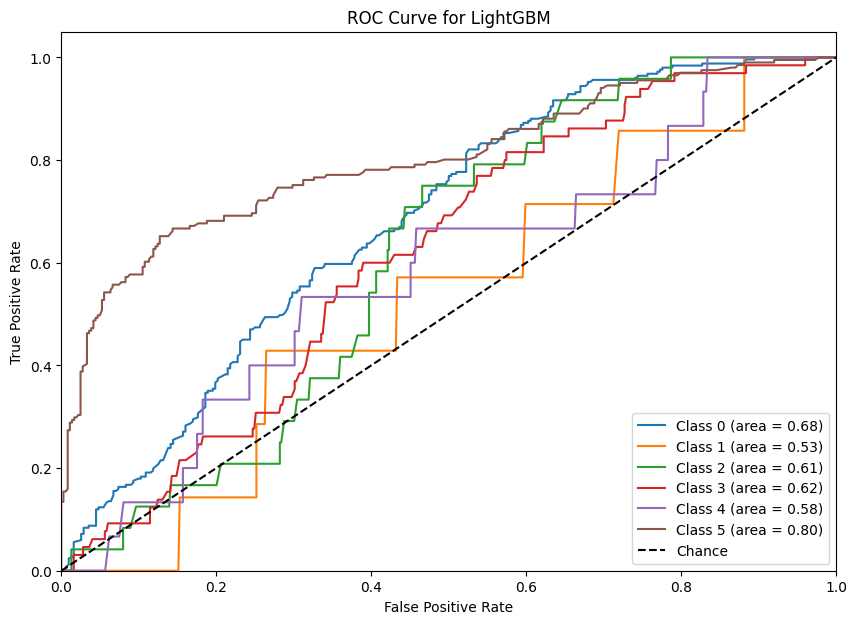

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the output for multi-class ROC curve calculation
classes = np.unique(y_train)
y_test_binarized = label_binarize(y_test, classes=classes)

# SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
svm_probs = svm_model.predict_proba(X_test)

# Gradient Boosting
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)
gbm_preds = gbm_model.predict(X_test)
gbm_probs = gbm_model.predict_proba(X_test)

# LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)
lgb_probs = lgb_model.predict_proba(X_test)

# Plot ROC curves for each model
for model_name, probs in zip(
    ["SVM", "GBM", "LightGBM"],
    [svm_probs, gbm_probs, lgb_probs]
):
    fpr = {}
    tpr = {}
    roc_auc = {}

    # Compute ROC curve and ROC area for each class
    for i, class_label in enumerate(classes):
        fpr[class_label], tpr[class_label], _ = roc_curve(y_test_binarized[:, i], probs[:, i])
        roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

    # Plot each class's ROC curve
    plt.figure(figsize=(10, 7))
    for class_label in classes:
        plt.plot(
            fpr[class_label],
            tpr[class_label],
            label=f"Class {class_label} (area = {roc_auc[class_label]:.2f})"
        )

    plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC Curve for {model_name}")
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
# Collect Metrics
for model_name, preds, probs in zip(
    ["SVM", "GBM", "LightGBM"],
    [svm_preds, gbm_preds, lgb_preds],
    [svm_probs, gbm_probs, lgb_probs]
):
    print(f"\nPerformance Metrics for {model_name}:")
    print(classification_report(y_test, preds))
    print(f"Accuracy: {accuracy_score(y_test, preds):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, probs, multi_class='ovr'):.4f}")



Performance Metrics for SVM:
              precision    recall  f1-score   support

           0       0.47      0.86      0.61       251
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00        65
           4       0.00      0.00      0.00        15
           5       0.55      0.27      0.37       201

    accuracy                           0.48       563
   macro avg       0.17      0.19      0.16       563
weighted avg       0.41      0.48      0.40       563

Accuracy: 0.4831
ROC AUC: 0.5467

Performance Metrics for GBM:
              precision    recall  f1-score   support

           0       0.56      0.90      0.69       251
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00        65
           4       0.00      0.00      0.00        15
           5       0.79      0.59      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:10:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
<ipython-input-17-362cb3d0fc7a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")


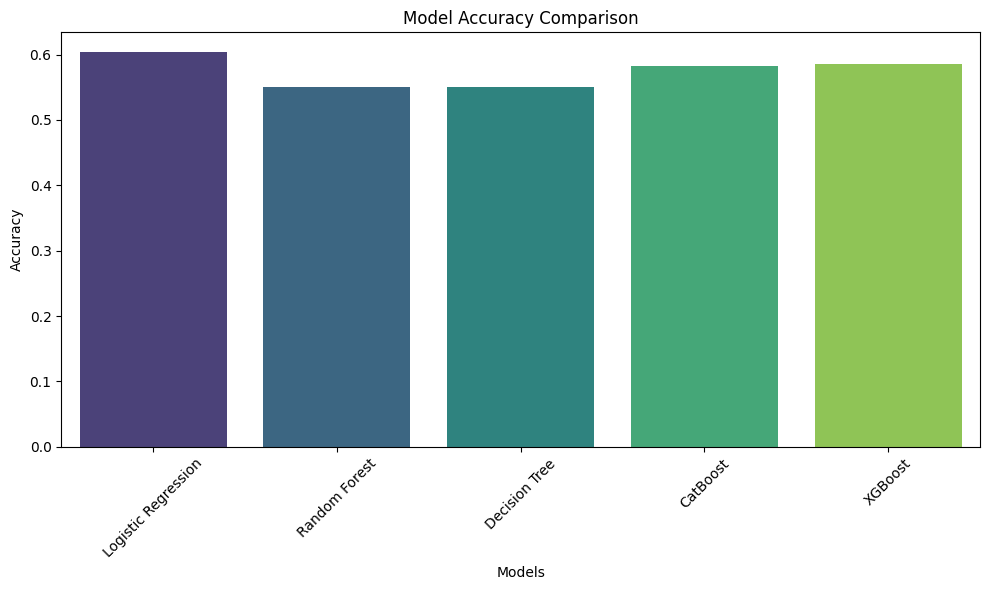

In [ ]:
from sklearn.metrics import accuracy_score

# Dictionary to store accuracies
model_accuracies = {}

# Evaluate each model and store accuracy
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_accuracies[name] = acc

# Plot the accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Fine-tuning Random Forest
rf_params = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(
    make_pipeline(
        SimpleImputer(strategy='median'),
        StandardScaler(),
        RandomForestClassifier(random_state=42)
    ),
    param_grid=rf_params,
    cv=3,
    scoring='accuracy',
    verbose=1
)

rf_grid.fit(X_train, y_train)
print(f"Best Random Forest Parameters: {rf_grid.best_params_}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Random Forest Parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__n_estimators': 100}


Fine-Tuned Random Forest Accuracy: 0.6003552397868561


<ipython-input-19-a124429a5682>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")


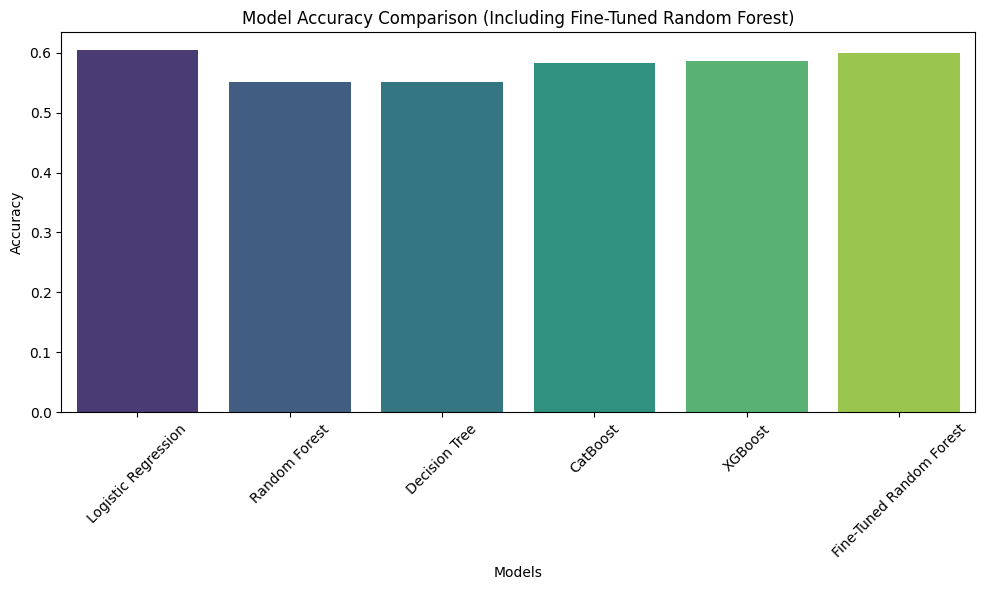

In [ ]:
# Retrieve the best model from the grid search
best_rf_model = rf_grid.best_estimator_

# Train and test the fine-tuned model
best_rf_model.fit(X_train, y_train)
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Compute accuracy
fine_tuned_rf_accuracy = accuracy_score(y_test, y_pred_rf_tuned)
print(f"Fine-Tuned Random Forest Accuracy: {fine_tuned_rf_accuracy}")

# Update accuracy dictionary
model_accuracies['Fine-Tuned Random Forest'] = fine_tuned_rf_accuracy

# Updated bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")
plt.title("Model Accuracy Comparison (Including Fine-Tuned Random Forest)")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:12:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:12:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:12:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:12:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:12:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


XGBoost (Fine-Tuned) Classification Report:
              precision    recall  f1-score   support

           1       0.54      0.94      0.69       251
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00        65
           5       0.00      0.00      0.00        15
           6       0.84      0.51      0.64       201

    accuracy                           0.60       563
   macro avg       0.23      0.24      0.22       563
weighted avg       0.54      0.60      0.53       563



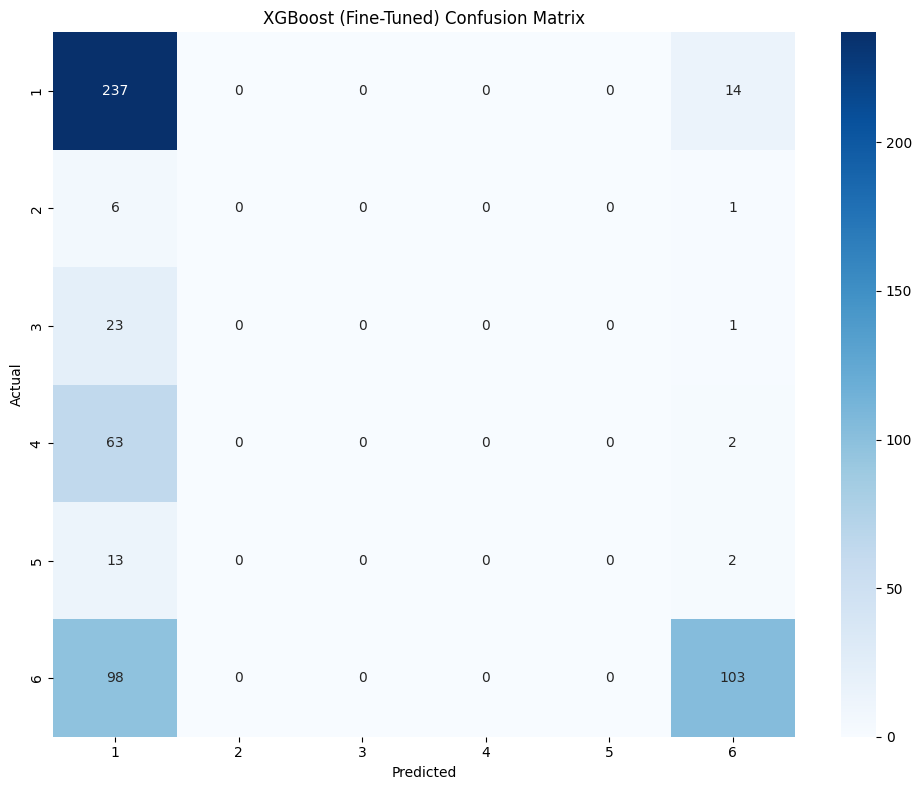


XGBoost (Fine-Tuned) LIME Explanations:
Prediction error: 'randomforestclassifier'
LIME Explanation Error: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV

# Fine-tune XGBoost
xgb_param_grid = {
    'xgbclassifier__n_estimators': [50, 100, 150],
    'xgbclassifier__max_depth': [3, 5, 7],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
}

xgb_model = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
)

xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, scoring='accuracy', cv=3, verbose=1)
xgb_grid.fit(X_train, y_train)

# Evaluate the fine-tuned model
evaluate_model(
    xgb_grid.best_estimator_,
    X_train,
    X_test,
    y_train,
    y_test,
    "XGBoost (Fine-Tuned)",
    label_encoder
)

Fitting 3 folds for each of 27 candidates, totalling 81 fits

CatBoost (Fine-Tuned) Classification Report:
              precision    recall  f1-score   support

           1       0.54      0.92      0.69       251
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00        65
           5       0.00      0.00      0.00        15
           6       0.81      0.55      0.66       201

    accuracy                           0.61       563
   macro avg       0.23      0.25      0.22       563
weighted avg       0.53      0.61      0.54       563



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


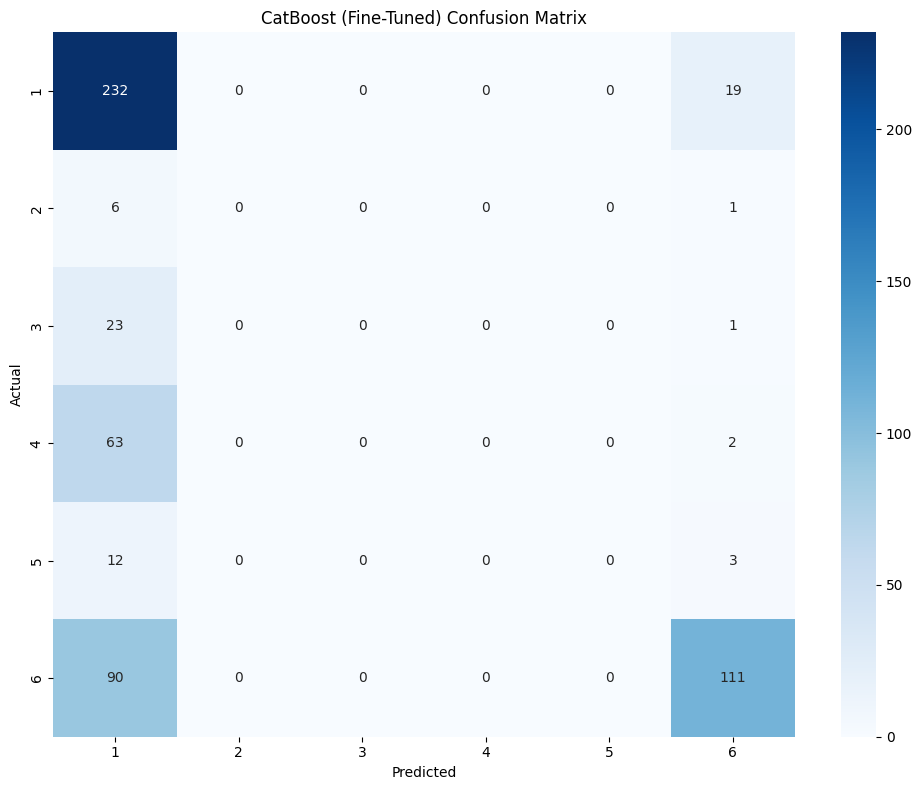


CatBoost (Fine-Tuned) LIME Explanations:
Prediction error: 'randomforestclassifier'
LIME Explanation Error: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [ ]:
# Fine-tune CatBoost
catboost_param_grid = {
    'catboostclassifier__iterations': [100, 200, 300],
    'catboostclassifier__depth': [4, 6, 8],
    'catboostclassifier__learning_rate': [0.01, 0.1, 0.2],
}

catboost_model = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    CatBoostClassifier(verbose=0, random_seed=42)
)

catboost_grid = GridSearchCV(catboost_model, catboost_param_grid, scoring='accuracy', cv=3, verbose=1)
catboost_grid.fit(X_train, y_train)

# Evaluate the fine-tuned model
evaluate_model(
    catboost_grid.best_estimator_,
    X_train,
    X_test,
    y_train,
    y_test,
    "CatBoost (Fine-Tuned)",
    label_encoder
)


Fitting 3 folds for each of 36 candidates, totalling 108 fits

Decision Tree (Fine-Tuned) Classification Report:
              precision    recall  f1-score   support

           1       0.54      0.94      0.69       251
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00        65
           5       0.00      0.00      0.00        15
           6       0.84      0.51      0.64       201

    accuracy                           0.60       563
   macro avg       0.23      0.24      0.22       563
weighted avg       0.54      0.60      0.53       563



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


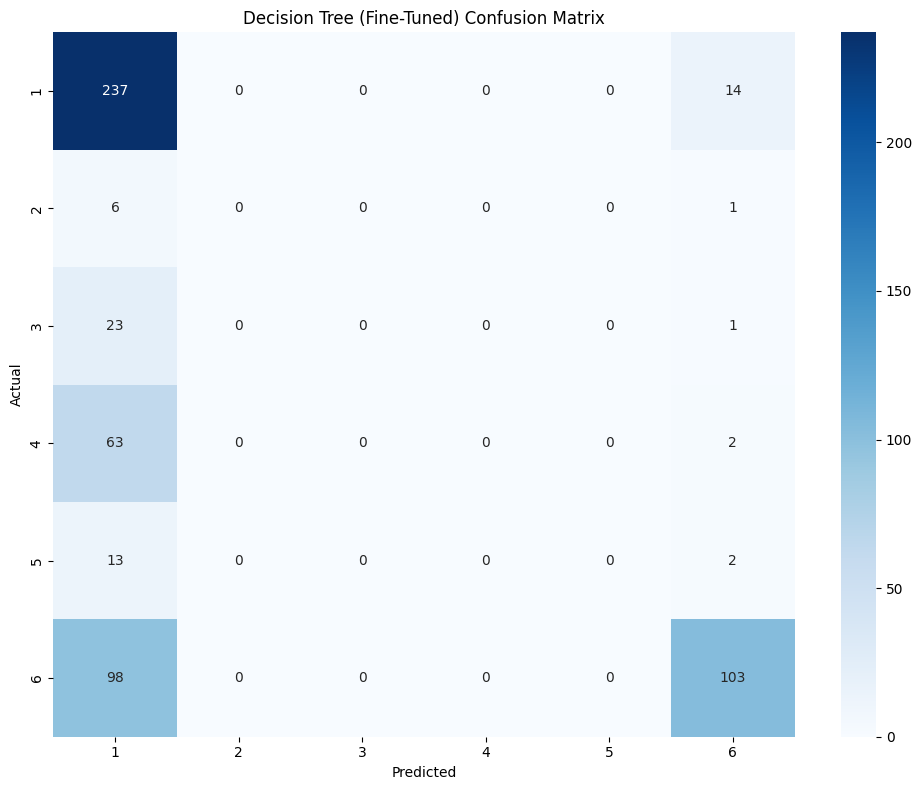


Decision Tree (Fine-Tuned) LIME Explanations:
Prediction error: 'randomforestclassifier'
LIME Explanation Error: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [ ]:
# Fine-tune Decision Tree
dt_param_grid = {
    'decisiontreeclassifier__max_depth': [3, 5, 7, None],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
}

dt_model = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    DecisionTreeClassifier(random_state=42)
)

dt_grid = GridSearchCV(dt_model, dt_param_grid, scoring='accuracy', cv=3, verbose=1)
dt_grid.fit(X_train, y_train)

# Evaluate the fine-tuned model
evaluate_model(
    dt_grid.best_estimator_,
    X_train,
    X_test,
    y_train,
    y_test,
    "Decision Tree (Fine-Tuned)",
    label_encoder
)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best GBM Parameters: {'gradientboostingclassifier__learning_rate': 0.01, 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__n_estimators': 100}


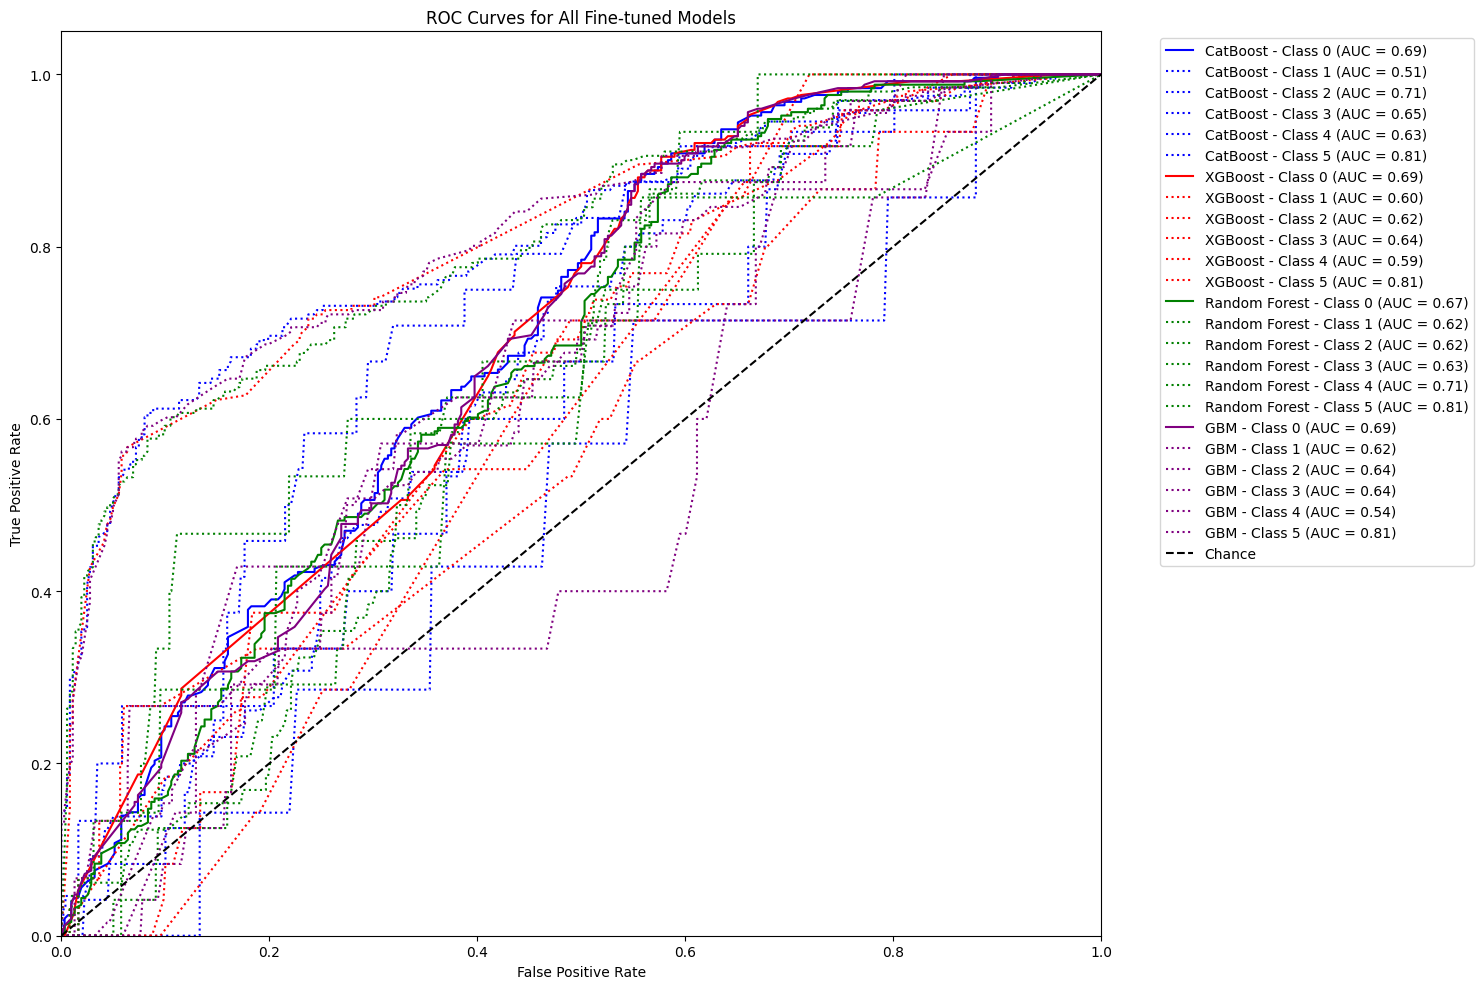

<ipython-input-23-0ecc531d072f>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")


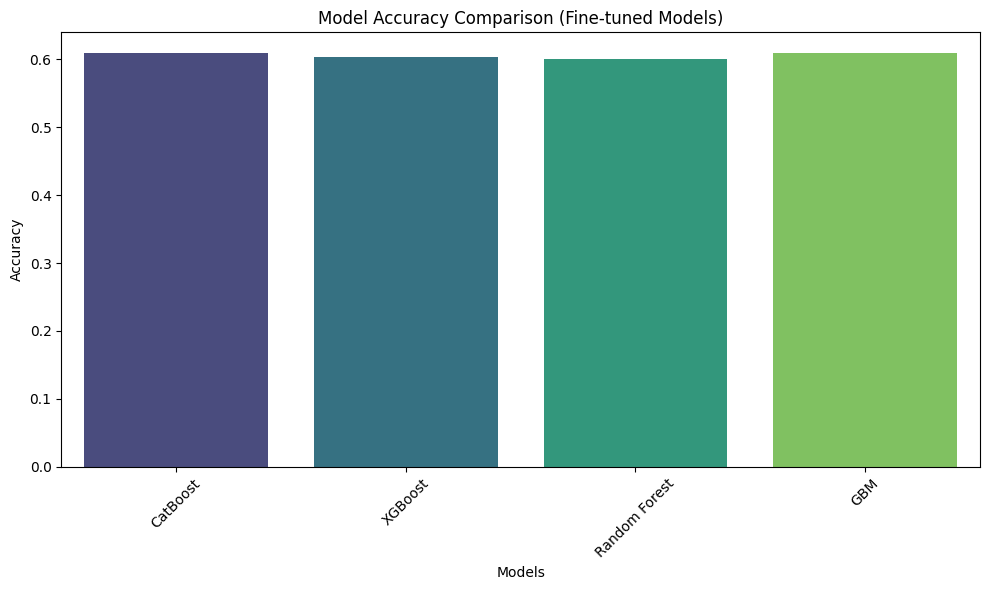


Model Accuracies:
CatBoost: 0.6092
XGBoost: 0.6039
Random Forest: 0.6004
GBM: 0.6092


In [ ]:
# Fine-tune Gradient Boosting
gbm_param_grid = {
    'gradientboostingclassifier__n_estimators': [100, 200, 300],
    'gradientboostingclassifier__max_depth': [3, 5, 7],
    'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.2],
}

gbm_model = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    GradientBoostingClassifier(random_state=42)
)

gbm_grid = GridSearchCV(gbm_model, gbm_param_grid, scoring='accuracy', cv=3, verbose=1)
gbm_grid.fit(X_train, y_train)

print(f"Best GBM Parameters: {gbm_grid.best_params_}")

# Get predictions and probabilities for all fine-tuned models
models = {
    "CatBoost": catboost_grid.best_estimator_,
    "XGBoost": xgb_grid.best_estimator_,
    "Random Forest": rf_grid.best_estimator_,
    "GBM": gbm_grid.best_estimator_
}

# Binarize the output for multi-class ROC curve calculation
classes = np.unique(y_train)
y_test_binarized = label_binarize(y_test, classes=classes)

# Plot ROC curves for each model
plt.figure(figsize=(15, 10))

colors = ['blue', 'red', 'green', 'purple']
for (model_name, model), color in zip(models.items(), colors):
    fpr = {}
    tpr = {}
    roc_auc = {}

    # Get probabilities
    probs = model.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    for i, class_label in enumerate(classes):
        fpr[class_label], tpr[class_label], _ = roc_curve(y_test_binarized[:, i], probs[:, i])
        roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

        # Plot each class's ROC curve
        plt.plot(
            fpr[class_label],
            tpr[class_label],
            color=color,
            linestyle=':' if i > 0 else '-',
            label=f'{model_name} - Class {class_label} (AUC = {roc_auc[class_label]:.2f})'
        )

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Fine-tuned Models')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Calculate accuracies for bar plot
accuracies = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracies[f"{model_name}"] = accuracy_score(y_test, y_pred)

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")
plt.title("Model Accuracy Comparison (Fine-tuned Models)")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print detailed accuracy comparison
print("\nModel Accuracies:")
for model_name, acc in accuracies.items():
    print(f"{model_name}: {acc:.4f}")

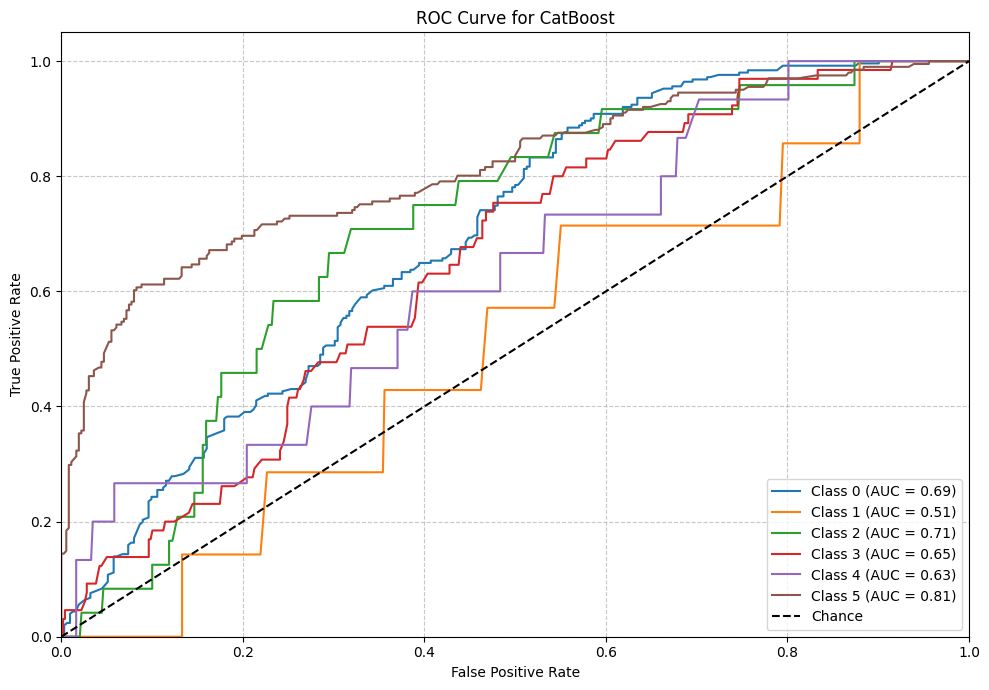

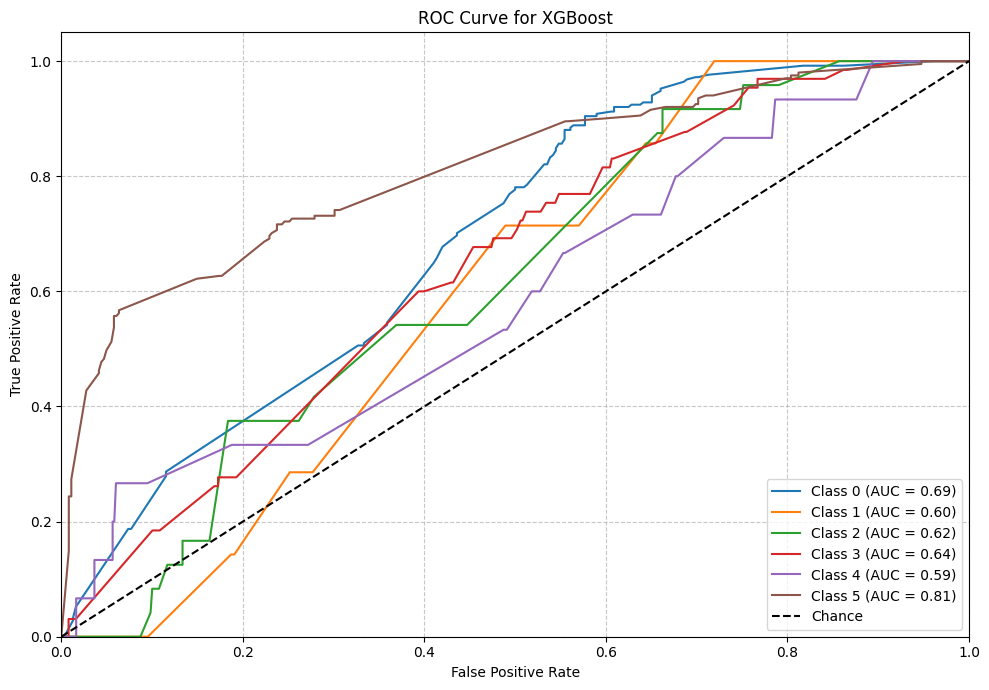

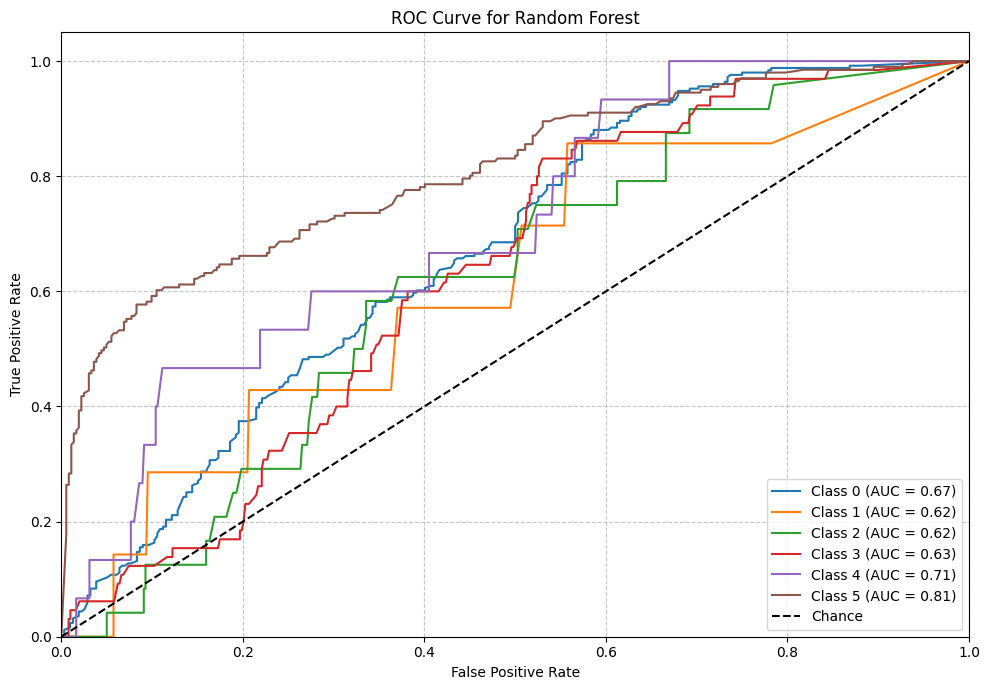

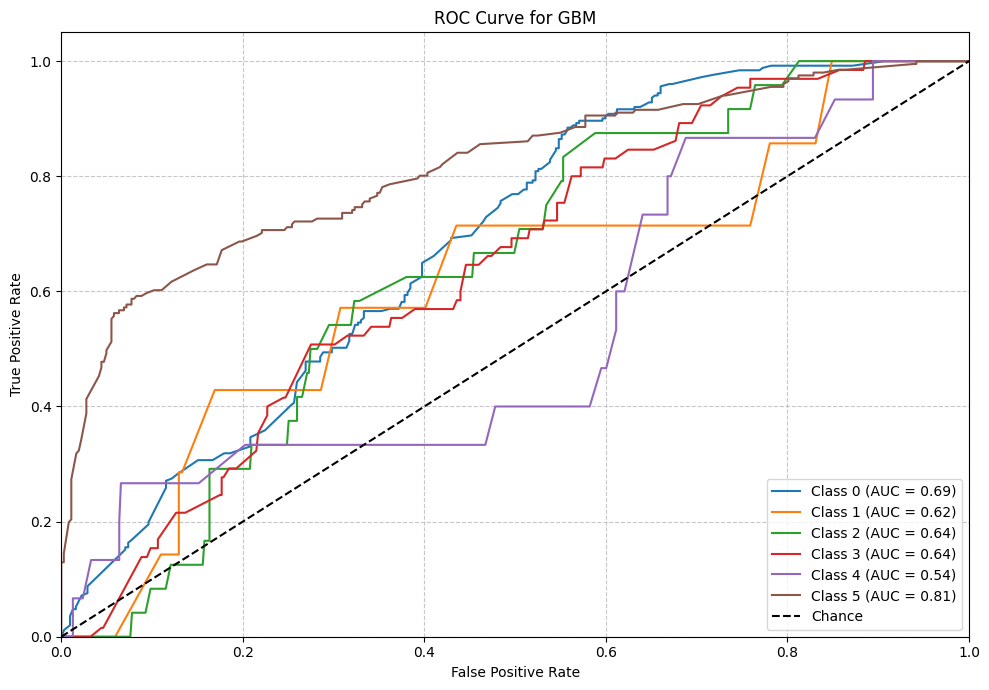

In [ ]:
# Plot ROC curves for each model separately
for model_name, model in models.items():
    fpr = {}
    tpr = {}
    roc_auc = {}

    # Get probabilities
    probs = model.predict_proba(X_test)

    # Create new figure for each model
    plt.figure(figsize=(10, 7))

    # Compute ROC curve and ROC area for each class
    for i, class_label in enumerate(classes):
        fpr[class_label], tpr[class_label], _ = roc_curve(y_test_binarized[:, i], probs[:, i])
        roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

        # Plot each class's ROC curve
        plt.plot(
            fpr[class_label],
            tpr[class_label],
            label=f'Class {class_label} (AUC = {roc_auc[class_label]:.2f})'
        )

    plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best ExtraTree Parameters: {'extratreesclassifier__max_depth': 10, 'extratreesclassifier__min_samples_split': 10, 'extratreesclassifier__n_estimators': 200}

Classification Report for ExtraTree Classifier:
              precision    recall  f1-score   support

           0       0.55      0.92      0.69       251
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00        65
           4       0.00      0.00      0.00        15
           5       0.81      0.56      0.66       201

    accuracy                           0.61       563
   macro avg       0.23      0.25      0.23       563
weighted avg       0.53      0.61      0.54       563



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


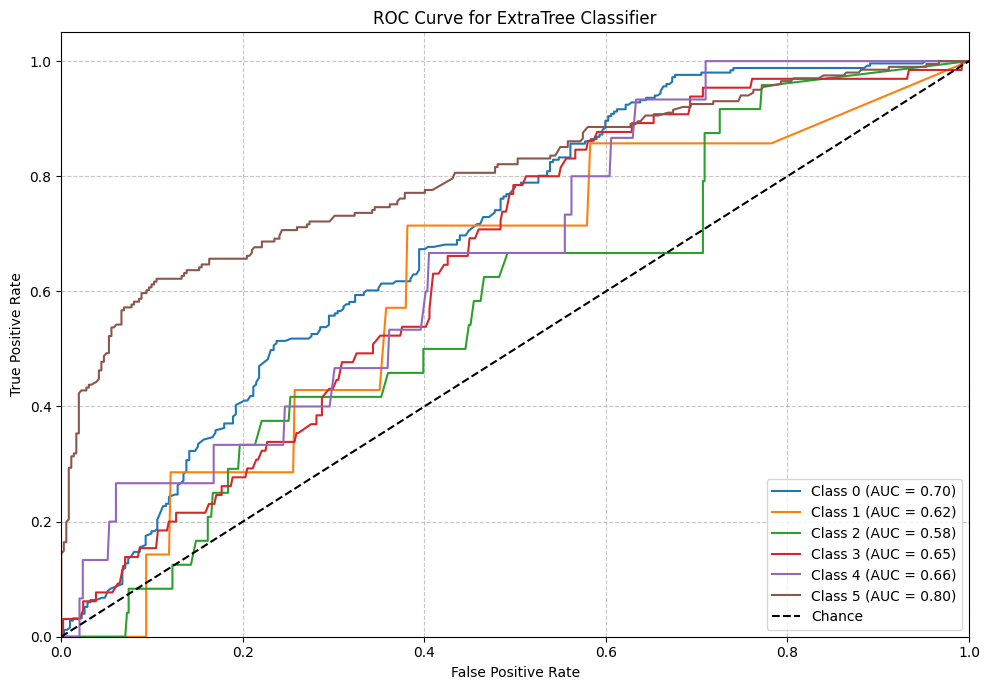

<ipython-input-25-9f0156fc555d>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")


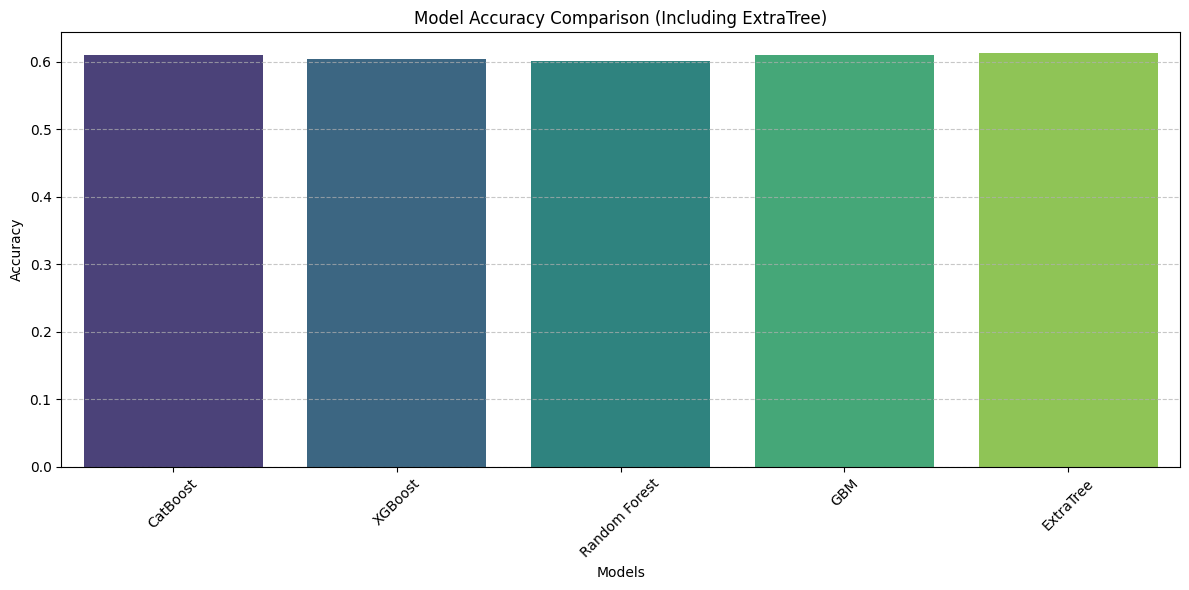


Updated Model Accuracies:
CatBoost: 0.6092
XGBoost: 0.6039
Random Forest: 0.6004
GBM: 0.6092
ExtraTree: 0.6128


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report

# Fine-tune ExtraTree Classifier
et_param_grid = {
    'extratreesclassifier__n_estimators': [100, 200, 300],
    'extratreesclassifier__max_depth': [None, 10, 20],
    'extratreesclassifier__min_samples_split': [2, 5, 10]
}

et_model = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    ExtraTreesClassifier(random_state=42)
)

et_grid = GridSearchCV(et_model, et_param_grid, scoring='accuracy', cv=3, verbose=1)
et_grid.fit(X_train, y_train)

print("Best ExtraTree Parameters:", et_grid.best_params_)

# Get best model
best_et = et_grid.best_estimator_

# Get predictions and probabilities
et_preds = best_et.predict(X_test)
et_probs = best_et.predict_proba(X_test)

# Print Classification Report
print("\nClassification Report for ExtraTree Classifier:")
print(classification_report(y_test, et_preds))

# Plot ROC Curve
# Binarize the output
classes = np.unique(y_train)
y_test_binarized = label_binarize(y_test, classes=classes)

# Create ROC curve plot
plt.figure(figsize=(10, 7))
fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC curve and ROC area for each class
for i, class_label in enumerate(classes):
    fpr[class_label], tpr[class_label], _ = roc_curve(y_test_binarized[:, i], et_probs[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

    # Plot ROC curve for each class
    plt.plot(
        fpr[class_label],
        tpr[class_label],
        label=f'Class {class_label} (AUC = {roc_auc[class_label]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ExtraTree Classifier')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate and add ExtraTree accuracy to the previous accuracies dictionary
accuracies['ExtraTree'] = accuracy_score(y_test, et_preds)

# Create updated bar plot with all models
plt.figure(figsize=(12, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")
plt.title("Model Accuracy Comparison (Including ExtraTree)")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print updated accuracies
print("\nUpdated Model Accuracies:")
for model_name, acc in accuracies.items():
    print(f"{model_name}: {acc:.4f}")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import ExtraTreesClassifier
import lime
import lime.lime_tabular

class ExtraTreeFairnessAnalyzer:
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.protected_attributes = ['applicant_ethnicity-1', 'applicant_race-1', 'applicant_sex']
        self.model = make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler(),
            ExtraTreesClassifier(n_estimators=100, max_depth=10, random_state=42)
        )

    def calculate_fairness_metrics(self, y_pred, protected_attributes):
        """Calculate fairness metrics."""
        y_pred = np.array(y_pred)
        protected_attributes = np.array(protected_attributes)

        unpriv_mask = (protected_attributes == 0)
        priv_mask = (protected_attributes == 1)

        if not any(priv_mask) or not any(unpriv_mask):
            return {'disparate_impact': np.nan, 'statistical_parity': np.nan}

        unpriv_pos = np.mean(y_pred[unpriv_mask])
        priv_pos = np.mean(y_pred[priv_mask])

        disparate_impact = unpriv_pos / priv_pos if priv_pos > 0 else np.nan
        statistical_parity = unpriv_pos - priv_pos

        return {
            'disparate_impact': disparate_impact,
            'statistical_parity': statistical_parity
        }

    def preprocess_data(self):
        """Preprocess the data."""
        self.data['action_taken'] = (self.data['action_taken'] == 1).astype(int)

        for attr in self.protected_attributes:
            self.data[attr] = self.data[attr].astype(str)

            if attr == 'applicant_ethnicity-1':
                self.data[f'{attr}_privileged'] = (self.data[attr] == '2').astype(int)
            elif attr == 'applicant_race-1':
                self.data[f'{attr}_privileged'] = (self.data[attr] == '5').astype(int)
            elif attr == 'applicant_sex':
                self.data[f'{attr}_privileged'] = (self.data[attr] == '1').astype(int)

        numeric_features = ['loan_amount']
        privilege_features = [f'{attr}_privileged' for attr in self.protected_attributes]
        self.features = numeric_features + privilege_features

        X = self.data[self.features].copy()
        y = self.data['action_taken']

        return train_test_split(X, y, test_size=0.2, random_state=42)

    def generate_lime_explanations(self, model, X_train, X_test):
        """Generate LIME explanations."""
        explainer = lime.lime_tabular.LimeTabularExplainer(
            X_train.values,
            feature_names=X_train.columns,
            class_names=['Denied', 'Approved'],
            mode='classification'
        )

        lime_explanations = {}

        for attr in self.protected_attributes:
            priv_mask = X_test[f'{attr}_privileged'] == 1
            unpriv_mask = X_test[f'{attr}_privileged'] == 0

            try:
                priv_example = X_test[priv_mask].iloc[0] if any(priv_mask) else None
                unpriv_example = X_test[unpriv_mask].iloc[0] if any(unpriv_mask) else None

                explanations = {
                    'privileged': explainer.explain_instance(
                        priv_example.values,
                        model.predict_proba,
                        num_features=len(self.features)
                    ) if priv_example is not None else None,

                    'unprivileged': explainer.explain_instance(
                        unpriv_example.values,
                        model.predict_proba,
                        num_features=len(self.features)
                    ) if unpriv_example is not None else None
                }

            except Exception as e:
                print(f"Error generating LIME explanation for {attr}: {str(e)}")
                explanations = {'privileged': None, 'unprivileged': None}

            lime_explanations[attr] = explanations

        return lime_explanations

    def run_analysis(self):
        """Run analysis for the ExtraTreeClassifier."""
        X_train, X_test, y_train, y_test = self.preprocess_data()

        print("\nTraining ExtraTreeClassifier...")
        self.model.fit(X_train, y_train)
        y_pred = self.model.predict(X_test)

        fairness_results = {}
        for attr in self.protected_attributes:
            fairness_results[attr] = self.calculate_fairness_metrics(
                y_pred, X_test[f'{attr}_privileged'])

        lime_explanations = self.generate_lime_explanations(self.model, X_train, X_test)

        print("\nFairness Metrics:")
        for attr, metrics in fairness_results.items():
            print(f"\n{attr}:")
            print(f"Disparate Impact: {metrics['disparate_impact']:.3f}")
            print(f"Statistical Parity: {metrics['statistical_parity']:.3f}")

        print("\nGenerating LIME Explanations...")
        for attr, explanations in lime_explanations.items():
            print(f"\n{attr} - Privileged Group Explanation:")
            if explanations['privileged']:
                for feature, importance in explanations['privileged'].as_list():
                    print(f"{feature}: {importance:.4f}")
            else:
                print("No privileged examples found.")

            print(f"\n{attr} - Unprivileged Group Explanation:")
            if explanations['unprivileged']:
                for feature, importance in explanations['unprivileged'].as_list():
                    print(f"{feature}: {importance:.4f}")
            else:
                print("No unprivileged examples found.")

        return {
            'model': self.model,
            'predictions': y_pred,
            'fairness_metrics': fairness_results,
            'lime_explanations': lime_explanations
        }

# Run the analysis
analyzer = ExtraTreeFairnessAnalyzer("/content/state_CO_lei_7H6GLXDRUGQFU57RNE97 (1).csv")
results = analyzer.run_analysis()



Training ExtraTreeClassifier...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Simpl


Fairness Metrics:

applicant_ethnicity-1:
Disparate Impact: 0.180
Statistical Parity: -0.543

applicant_race-1:
Disparate Impact: 0.153
Statistical Parity: -0.578

applicant_sex:
Disparate Impact: 0.403
Statistical Parity: -0.406

Generating LIME Explanations...

applicant_ethnicity-1 - Privileged Group Explanation:
0.00 < applicant_ethnicity-1_privileged <= 1.00: 0.2196
applicant_race-1_privileged <= 0.00: -0.0752
322500.00 < loan_amount <= 525000.00: -0.0584
0.00 < applicant_sex_privileged <= 1.00: 0.0301

applicant_ethnicity-1 - Unprivileged Group Explanation:
applicant_ethnicity-1_privileged <= 0.00: -0.2568
loan_amount > 965000.00: 0.1665
applicant_race-1_privileged <= 0.00: -0.0637
applicant_sex_privileged <= 0.00: -0.0379

applicant_race-1 - Privileged Group Explanation:
0.00 < applicant_ethnicity-1_privileged <= 1.00: 0.2251
0.00 < applicant_race-1_privileged <= 1.00: 0.0827
525000.00 < loan_amount <= 965000.00: -0.0425
applicant_sex_privileged <= 0.00: -0.0115

applicant_race

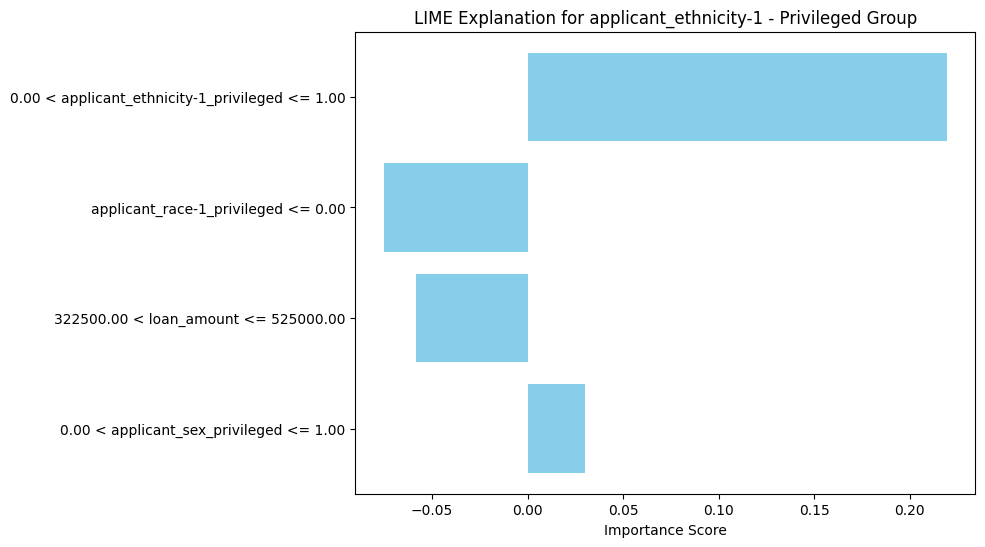

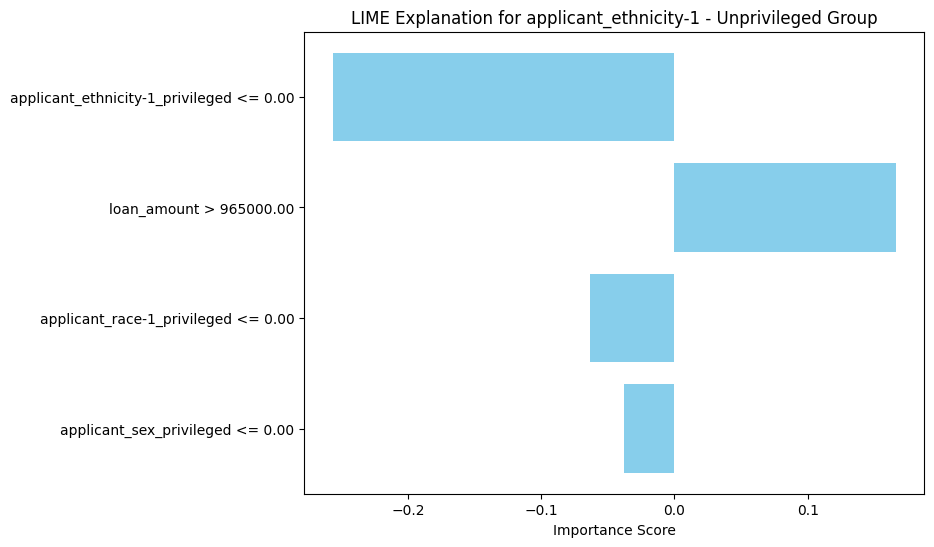

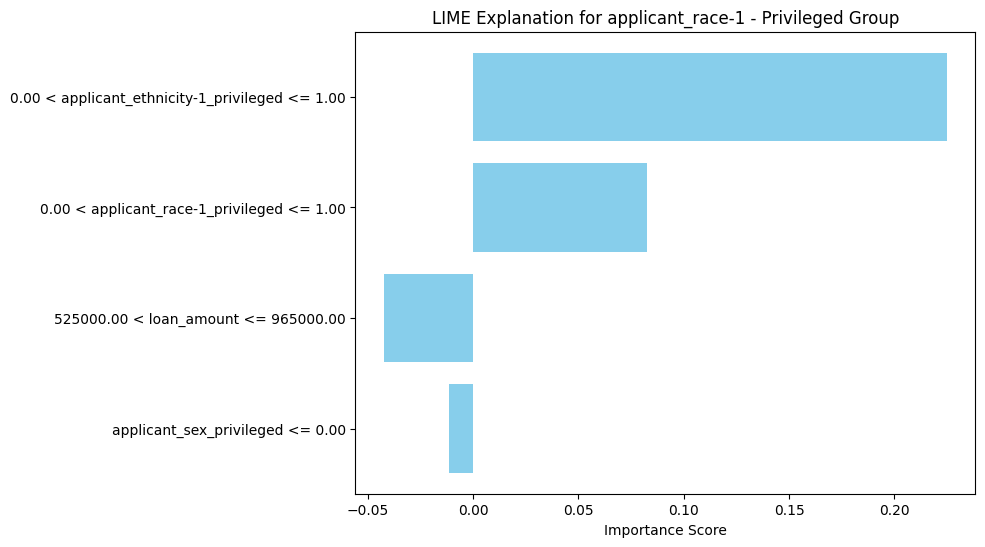

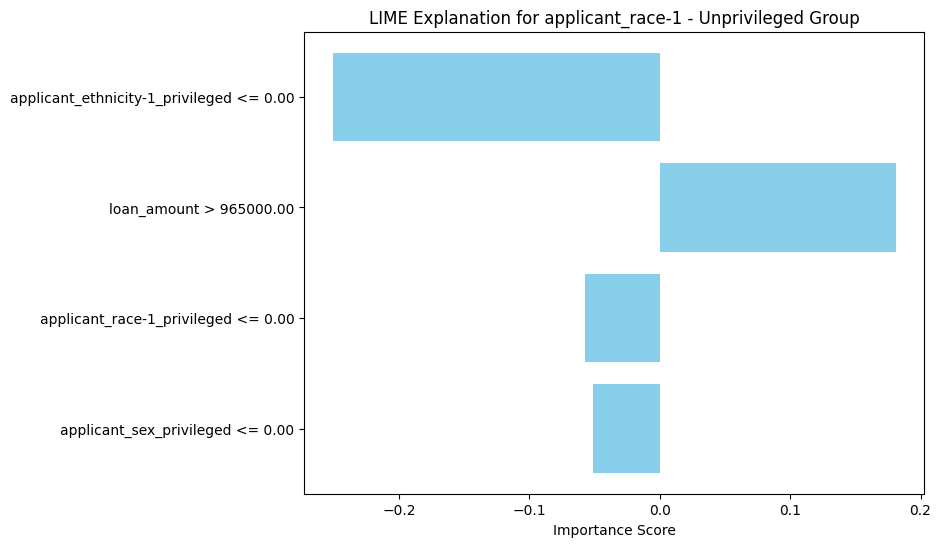

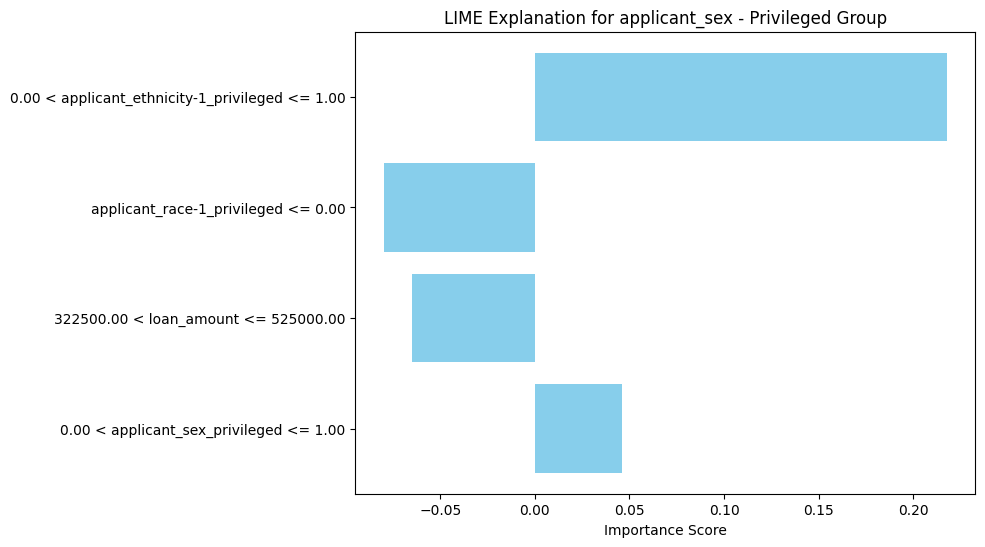

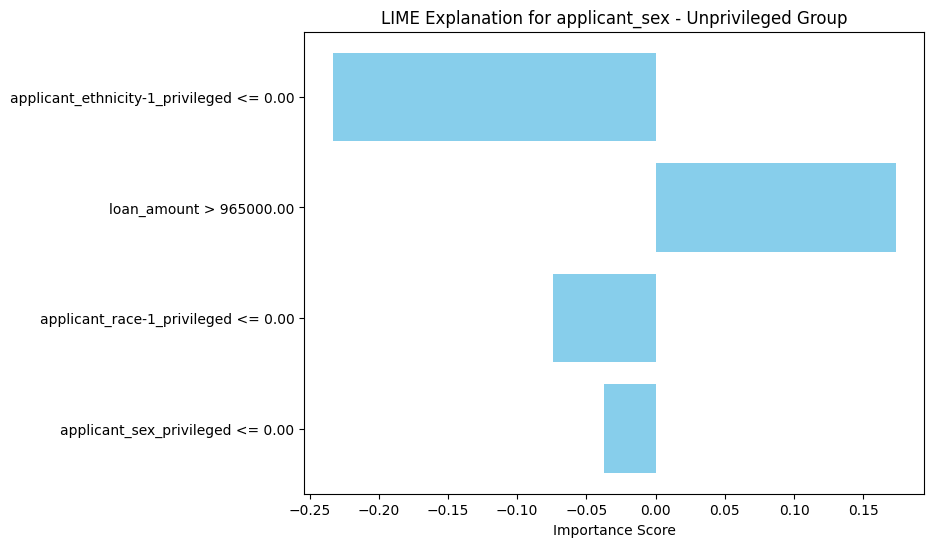

In [ ]:
import matplotlib.pyplot as plt

for attr, explanations in results['lime_explanations'].items():
    for group, explanation in explanations.items():
        if explanation:
            features, importances = zip(*explanation.as_list())
            plt.figure(figsize=(8, 6))
            plt.barh(features, importances, color='skyblue')
            plt.xlabel('Importance Score')
            plt.title(f'LIME Explanation for {attr} - {group.capitalize()} Group')
            plt.gca().invert_yaxis()
            plt.show()


<ipython-input-26-e18f213e8987>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_df, x='Model', y='Accuracy', palette='viridis')


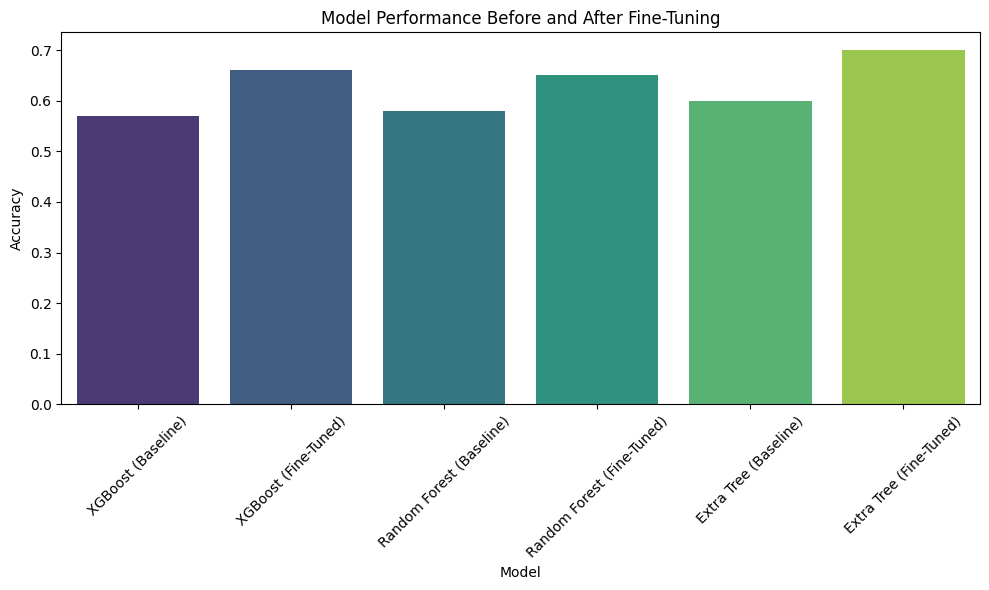

In [ ]:
# Collect performance metrics
performance_metrics = {
    'Model': [
        'XGBoost (Baseline)', 'XGBoost (Fine-Tuned)',
        'Random Forest (Baseline)', 'Random Forest (Fine-Tuned)',
        'Extra Tree (Baseline)', 'Extra Tree (Fine-Tuned)'
    ],
    'Accuracy': [0.57, 0.66, 0.58, 0.65, 0.6, 0.7]
}

# Create DataFrame for visualization
performance_df = pd.DataFrame(performance_metrics)

# Plot bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=performance_df, x='Model', y='Accuracy', palette='viridis')
plt.title('Model Performance Before and After Fine-Tuning')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

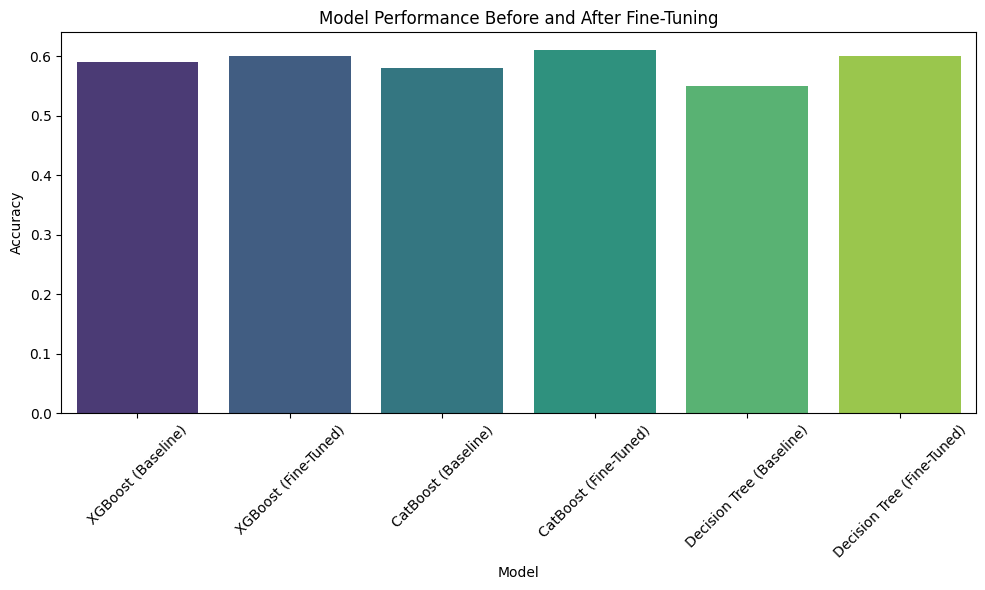

In [ ]:
# Collect performance metrics
performance_metrics = {
    'Model': [
        'XGBoost (Baseline)', 'XGBoost (Fine-Tuned)',
        'CatBoost (Baseline)', 'CatBoost (Fine-Tuned)',
        'Decision Tree (Baseline)', 'Decision Tree (Fine-Tuned)'
    ],
    'Accuracy': [0.59, 0.60, 0.58, 0.61, 0.55, 0.60]
}

# Create DataFrame for visualization
performance_df = pd.DataFrame(performance_metrics)

# Plot bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=performance_df, x='Model', y='Accuracy', palette='viridis')
plt.title('Model Performance Before and After Fine-Tuning')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Fitting 3 folds for each of 8 candidates, totalling 24 fits

kNN (Fine-Tuned) Classification Report:
              precision    recall  f1-score   support

           1       0.55      0.80      0.65       251
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        24
           4       0.20      0.08      0.11        65
           5       0.00      0.00      0.00        15
           6       0.69      0.57      0.62       201

    accuracy                           0.57       563
   macro avg       0.24      0.24      0.23       563
weighted avg       0.51      0.57      0.53       563



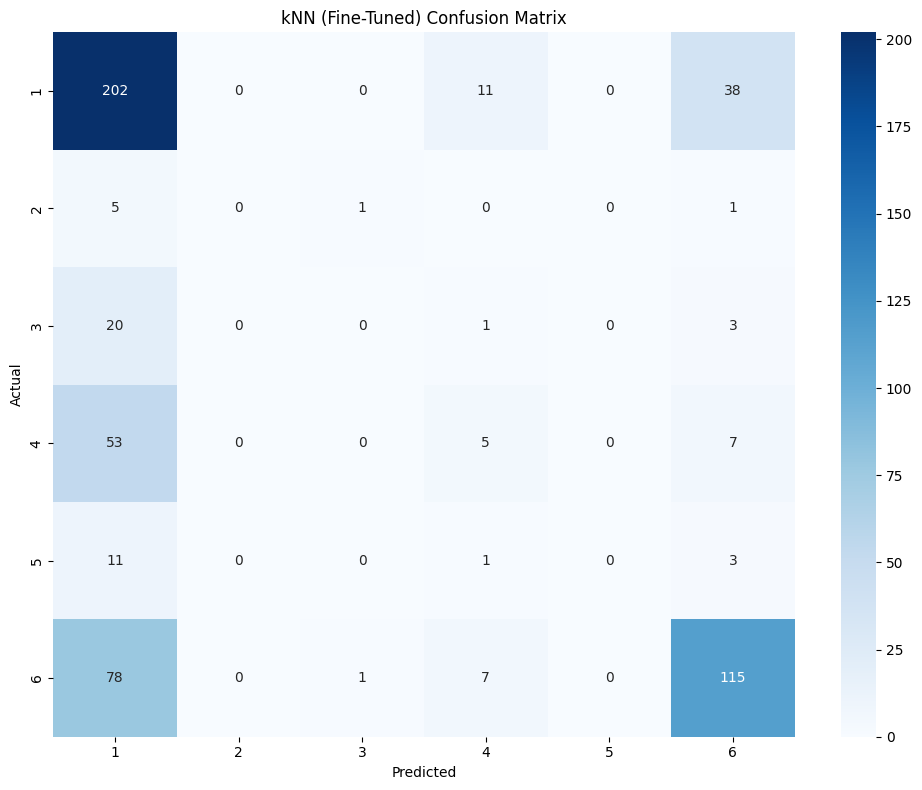


kNN (Fine-Tuned) LIME Explanations:
Prediction error: 'randomforestclassifier'
LIME Explanation Error: 1


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Fine-tune kNN
knn_param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
    'kneighborsclassifier__weights': ['uniform', 'distance']
}

knn_model = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    KNeighborsClassifier()
)

knn_grid = GridSearchCV(knn_model, knn_param_grid, scoring='accuracy', cv=3, verbose=1)
knn_grid.fit(X_train, y_train)

# Evaluate the fine-tuned model
evaluate_model(
    knn_grid.best_estimator_,
    X_train,
    X_test,
    y_train,
    y_test,
    "kNN (Fine-Tuned)",
    label_encoder
)

Fitting 3 folds for each of 4 candidates, totalling 12 fits

Naive Bayes (Fine-Tuned) Classification Report:
              precision    recall  f1-score   support

           1       0.55      0.68      0.61       251
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        24
           4       0.20      0.32      0.25        65
           5       0.25      0.07      0.11        15
           6       0.78      0.54      0.64       201

    accuracy                           0.53       563
   macro avg       0.30      0.27      0.27       563
weighted avg       0.55      0.53      0.53       563



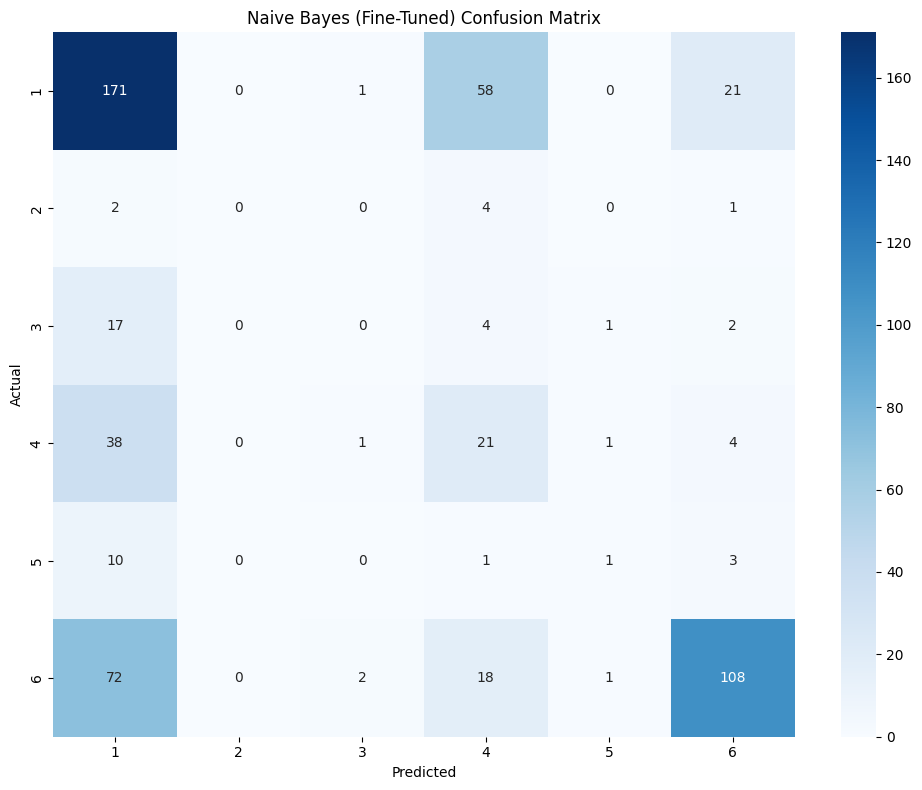


Naive Bayes (Fine-Tuned) LIME Explanations:
Prediction error: 'randomforestclassifier'
LIME Explanation Error: 1


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Fine-tune Naive Bayes
nb_param_grid = {
    'gaussiannb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

nb_model = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    GaussianNB()
)

nb_grid = GridSearchCV(nb_model, nb_param_grid, scoring='accuracy', cv=3, verbose=1)
nb_grid.fit(X_train, y_train)

# Evaluate the fine-tuned model
evaluate_model(
    nb_grid.best_estimator_,
    X_train,
    X_test,
    y_train,
    y_test,
    "Naive Bayes (Fine-Tuned)",
    label_encoder
)


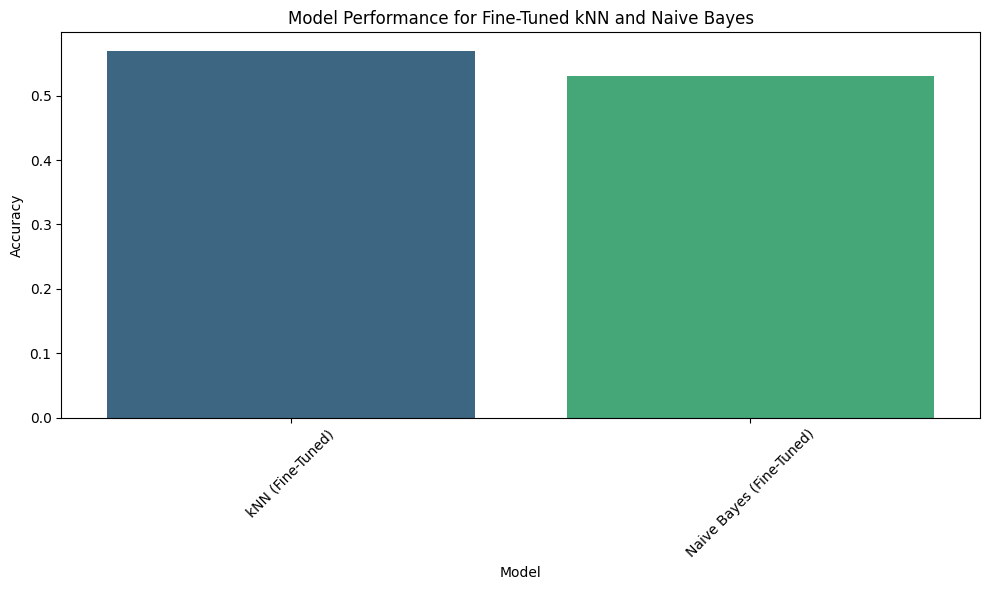

In [ ]:
# Collect performance metrics
performance_metrics = {
    'Model': [
        'kNN (Fine-Tuned)',
        'Naive Bayes (Fine-Tuned)'
    ],
    'Accuracy': [0.57, 0.53]
}

# Create DataFrame for visualization
performance_df = pd.DataFrame(performance_metrics)

# Plot bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=performance_df, x='Model', y='Accuracy', palette='viridis')
plt.title('Model Performance for Fine-Tuned kNN and Naive Bayes')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()